# </b> Обучение с учителем. 
# Качество модели интернет-магазин «В один клик». #

<b>Описание проекта</b>: Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений..
  

<b>Цель исследования</b>:

<b>1.</b>Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.

<b>2.</b>В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.

<b>3.</b>Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

<b>Ход исследования</b>:

<b>1.</b>Загрузка данных

<b>2.</b>Предобработка данных

<b>3.</b>Исследовательский анализ данных

<b>4.</b>Объединить таблицы

<b>5.</b>Корреляционный анализ

<b>6.</b>Использование пайплайнов

<b>7.</b>Анализ важности признаков

<b>8.</b>Сегментация покупателей

<b>9.</b>Общий вывод





<b>market_file.csv</b>-Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
<b>id</b> — номер покупателя в корпоративной базе данных.

<b>Покупательская активность</b> — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
<b>Тип сервиса</b> — уровень сервиса, например «премиум» и «стандарт».

<b>Разрешить сообщать</b> — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.

<b>Маркет_актив_6_мес</b> — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.

<b>Маркет_актив_тек_мес</b> — количество маркетинговых коммуникаций в текущем месяце.

<b>Длительность</b> — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.

<b>Акционные_покупки</b> — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.

<b>Популярная_категориям</b> — самая популярная категория товаров у покупателя за последние 6 месяцев.

<b>Средний_просмотр_категорий_за_визит</b> — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.

<b>Неоплаченные_продукты_штук_квартал</b> — общее число неоплаченных товаров в корзине за последние 3 месяца.

<b>Ошибка_сервиса</b> — число сбоев, которые коснулись покупателя во время посещения сайта.

<b>Страниц_за_визит</b> — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

<b>market_money.csv</b>-таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
<b>id</b> — номер покупателя в корпоративной базе данных.

<b>Период </b>— название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.

<b>Выручка</b> — сумма выручки за период.
    
<b>market_time.csv</b>-таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

<b>id</b> — номер покупателя в корпоративной базе данных.

<b>Период</b> — название периода, во время которого зафиксировано общее время.

<b>минут</b> — значение времени, проведённого на сайте, в минутах.
    
<b>money.csv</b>-таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

<b>id </b>— номер покупателя в корпоративной базе данных.

<b>Прибыль</b> — значение прибыли.

<b>Общий вывод</b>
Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

In [1]:
!pip install scikit-learn==1.5.1
!pip install shap -q
!pip -q install phik
!pip install --upgrade shap
!pip install matplotlib==3.10


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from phik import phik_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, f1_score
import phik
import shap
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import make_classification

<b>1. Загрузка данных</b>

Создадим функцию, которая будет проводить просмотр и анализ данных.

In [3]:
def analyze_dataframe(DataFrame, name='DataFrame', sample_size=5,info_check=True,head_check=True, analyze_colonok=True,
                      describe_check=True, duplicates_check=True, missing_check=True,dtypes_check=True, datetime_is_numeric=True):
    """
    Анализирует DataFrame и выводит основные характеристики.
    
    Параметры:
    - df: DataFrame для анализа
    - name: Название DataFrame (для вывода)
    - sample_size: Количество строк для вывода в sample
    - duplicates_check: Проверять дубликаты (True/False)
   
    """
    
    print(f"{'-'*50}")
    print(f"📊 Анализ DataFrame: {name}")
    if analyze_colonok:
        print(f"📏 Размер: {DataFrame.shape[0]} строк, {DataFrame.shape[1]} колонок")
        print(f"{'-'*50}")
    
    # 1. Основная информация
    if info_check:    
        print("Основная информация (.info):")
        DataFrame.info()
        print("\n")
    
    # 2. Просмотр данных
    if head_check:
        print(f"👀 Первые {sample_size} строк (.head):")
        display(DataFrame.head(sample_size))
       
    # 3. Статистика по числовым колонкам
    if describe_check:     
        print("\n Описательная статистика (.describe):")
        display(DataFrame.describe(include='all'))
    
    # 4. Проверка дубликатов
    if duplicates_check:
        dup = DataFrame.duplicated().sum()
        print(f"\n Дубликаты: {dup} полных дубликатов")
       
    
    # 5. Пропущенные значения
    if missing_check:
        print(f"{'-'*50}")
        missing = DataFrame.isna().sum()  # Количество пропусков в каждом столбце
        if missing.sum() > 0:  # Если есть хотя бы один пропуск
            print("\n Пропущенные значения:\n", missing[missing > 0])  # Выводим только колонки с пропусками
        else:
            print("Пропусков нет!")
    
    # 6. Типы данных
    if dtypes_check:
        dtypes = DataFrame.dtypes.value_counts()
        print("\n Типы данных:")
        display(dtypes.to_frame('Количество колонок'))

Посмотрим на датасет data

In [4]:
data=pd.read_csv(r'C:\Users\bocme\supervised_learning_project\market_file.csv')
analyze_dataframe(data,duplicates_check=False,missing_check=False,describe_check=False,sample_size=10)

--------------------------------------------------
📊 Анализ DataFrame: DataFrame
📏 Размер: 1300 строк, 13 колонок
--------------------------------------------------
Основная информация (.info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория              

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   
5  215353                 Снизилась   стандартт                 да   
6  215354                 Снизилась   стандартт                 да   
7  215355                 Снизилась   стандартт                нет   
8  215356                 Снизилась   стандартт                 да   
9  215357                 Снизилась   стандартт                 да   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   
5                 3.3                     4           762               0.26   
6                 5.1                     3           431               0.23   
7                 4.7                     4           284               0.17   
8                 4.2                     4           192               0.14   
9                 3.9                     5           154               0.00   

             Популярная_категория  Средний_просмотр_категорий_за_визит  \
0                Товары для детей                                    6   
1                Товары для детей                                    4   
2               Домашний текстиль                                    5   
3                Товары для детей                                    5   
4                Товары для детей                                    3   
5               Домашний текстиль                                    4   
6           Косметика и аксесуары                                    2   
7                Товары для детей                                    5   
8           Косметика и аксесуары                                    2   
9  Техника для красоты и здоровья                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2  
5                                   1               1                 4  
6                                   3               7                 2  
7                                   1               6                 4  
8                                   2               1                 3  
9                                   3               9                 5


 Типы данных:


Количество колонок
int64                     7
object                    4
float64                   2

Данные соответствуют описанию, маркет_актив_6_мес преобразовать из object в float. Необходимо заменить в названии столбцов пробелы на 

Посмотрим на датасет market_money

In [5]:
market_money=pd.read_csv(r'C:\Users\bocme\supervised_learning_project\market_money.csv')
analyze_dataframe(market_money,duplicates_check=False,missing_check=False,describe_check=False,sample_size=10)

--------------------------------------------------
📊 Анализ DataFrame: DataFrame
📏 Размер: 3900 строк, 3 колонок
--------------------------------------------------
Основная информация (.info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


👀 Первые 10 строк (.head):


id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6
5  215349     предыдущий_месяц   5216.0
6  215350  препредыдущий_месяц   4826.0
7  215350        текущий_месяц   5058.4
8  215350     предыдущий_месяц   5457.5
9  215351        текущий_месяц   6610.4


 Типы данных:


Количество колонок
int64                     1
object                    1
float64                   1

Данные соответствуют описанию, типы данных все корректные.

Посмотрим на датасет time

In [6]:
time=pd.read_csv(r'C:\Users\bocme\supervised_learning_project\market_time.csv')
analyze_dataframe(time,duplicates_check=False,missing_check=False,describe_check=False,sample_size=10)

--------------------------------------------------
📊 Анализ DataFrame: DataFrame
📏 Размер: 2600 строк, 3 колонок
--------------------------------------------------
Основная информация (.info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


👀 Первые 10 строк (.head):


id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13
5  215350  предыдцщий_месяц      8
6  215351     текущий_месяц     13
7  215351  предыдцщий_месяц     11
8  215352     текущий_месяц     11
9  215352  предыдцщий_месяц      8


 Типы данных:


Количество колонок
int64                    2
object                   1

Данные соответствуют описанию, типы данных все корректные. Необходимо исправить столбец минут писать с большой буквы.

Посмотрим на датасет money

In [7]:
money=pd.read_csv(r'C:\Users\bocme\supervised_learning_project\money.csv', delimiter = ';', decimal = ',')
analyze_dataframe(money,duplicates_check=False,missing_check=False,describe_check=False,sample_size=10)

--------------------------------------------------
📊 Анализ DataFrame: DataFrame
📏 Размер: 1300 строк, 2 колонок
--------------------------------------------------
Основная информация (.info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


👀 Первые 10 строк (.head):


id  Прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21
5  215353     3.95
6  215354     3.62
7  215355     5.26
8  215356     4.93
9  215357     4.66


 Типы данных:


Количество колонок
int64                     1
float64                   1

Данные соответствуют описанию, преобразовать столбец Прибыль из object в float,предварительно заменить запятые на точки. 

<b>Вывод:</b>

1.В датасете data маркет_актив_6_мес преобразовать из object в float, необходимо заменить в названии столбцов пробелы на _ 

2.В датасете market_money данные соответствуют описанию, типы данных все корректные.

3.В датасете time необходимо исправить столбец минут писать с большой буквы.

4.В датасете money все хорошо.

<b>2. Предобработка данных</b>

Заменим пробелы на _

In [8]:
def rename_columns(df):
    df.columns = df.columns.str.replace(' ', '_')
rename_columns(data)
rename_columns(time)
rename_columns(market_money)
rename_columns(money)

Преобразуем 'Маркет_актив_6_мес' в формат float

In [9]:
data['Маркет_актив_6_мес']=data['Маркет_актив_6_мес'].astype(float)

Посмотрим на явные дубликаты и пропуски в data

In [10]:
analyze_dataframe(data,head_check=False,describe_check=False)

--------------------------------------------------
📊 Анализ DataFrame: DataFrame
📏 Размер: 1300 строк, 13 колонок
--------------------------------------------------
Основная информация (.info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская_активность            1300 non-null   object 
 2   Тип_сервиса                          1300 non-null   object 
 3   Разрешить_сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория              

Количество колонок
int64                     7
object                    4
float64                   2

Создадим функцию отберет столбцы по типу даннных и выведит уникальные значения (если object), MaxMin(если числое значение)

In [11]:
def proccessing(df):
    results = {}
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            # Для числовых данных сортируем по убыванию
            results[column] = df[column].sort_values(ascending=False).values
        elif pd.api.types.is_object_dtype(df[column]):
            # Для строковых/категориальных данных получаем уникальные значения
            results[column] = df[column].unique()
        else:
            # Для других типов (datetime и пр.) просто сохраняем значения
            results[column] = df[column].values
          
    return results

In [12]:
proccessing(data.drop('id', axis=1))

{'Покупательская_активность': array(['Снизилась', 'Прежний уровень'], dtype=object),
 'Тип_сервиса': array(['премиум', 'стандартт', 'стандарт'], dtype=object),
 'Разрешить_сообщать': array(['да', 'нет'], dtype=object),
 'Маркет_актив_6_мес': array([6.6, 6.6, 6.6, ..., 0.9, 0.9, 0.9]),
 'Маркет_актив_тек_мес': array([5, 5, 5, ..., 3, 3, 3], dtype=int64),
 'Длительность': array([1079, 1076, 1073, ...,  121,  121,  110], dtype=int64),
 'Акционные_покупки': array([0.99, 0.99, 0.99, ..., 0.  , 0.  , 0.  ]),
 'Популярная_категория': array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
        'Техника для красоты и здоровья', 'Кухонная посуда',
        'Мелкая бытовая техника и электроника'], dtype=object),
 'Средний_просмотр_категорий_за_визит': array([6, 6, 6, ..., 1, 1, 1], dtype=int64),
 'Неоплаченные_продукты_штук_квартал': array([10, 10, 10, ...,  0,  0,  0], dtype=int64),
 'Ошибка_сервиса': array([9, 9, 9, ..., 0, 0, 0], dtype=int64),
 'Страниц_за_визит': array([20

В столбце 'Тип_сервиса' 'стандартт', 'стандарт' неявные дубликаты. Остальное не вызывает подозрения.

Заменим стандартт на стандарт 

In [13]:
data['Тип_сервиса']=data['Тип_сервиса'].replace('стандартт','стандарт')
data['Тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

Посмотрим на явные дубликаты и пропуски в time

In [14]:
analyze_dataframe(time,head_check=False,describe_check=False)

--------------------------------------------------
📊 Анализ DataFrame: DataFrame
📏 Размер: 2600 строк, 3 колонок
--------------------------------------------------
Основная информация (.info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB



 Дубликаты: 0 полных дубликатов
--------------------------------------------------
Пропусков нет!

 Типы данных:


Количество колонок
int64                    2
object                   1

In [15]:
proccessing(time)

{'id': array([216647, 216647, 216646, ..., 215349, 215348, 215348], dtype=int64),
 'Период': array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object),
 'минут': array([23, 23, 23, ...,  4,  4,  4], dtype=int64)}

Опечатка в столбце период 'предыдцщий_месяц' заменим на 'предыдущий_месяц'

In [16]:
time['Период']=time['Период'].replace('предыдцщий_месяц','предыдущий_месяц')
time=time.rename(columns={'минут':'Минут'})

Посмотрим на явные дубликаты и пропуски в market_money

In [17]:
analyze_dataframe(market_money,head_check=False,describe_check=False)

--------------------------------------------------
📊 Анализ DataFrame: DataFrame
📏 Размер: 3900 строк, 3 колонок
--------------------------------------------------
Основная информация (.info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB



 Дубликаты: 0 полных дубликатов
--------------------------------------------------
Пропусков нет!

 Типы данных:


Количество колонок
int64                     1
object                    1
float64                   1

In [18]:
proccessing(market_money)

{'id': array([216647, 216647, 216647, ..., 215348, 215348, 215348], dtype=int64),
 'Период': array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
       dtype=object),
 'Выручка': array([106862.2,   7799.4,   7605.3, ...,      0. ,      0. ,      0. ])}

В столбце 'Выручка' явная аномалия 106862 больше следущего значение на порядок. Удалим его

In [19]:
market_money=market_money.loc[market_money['Выручка']<10**4]

Посмотрим на явные дубликаты и пропуски в money

In [20]:
analyze_dataframe(money,head_check=False,describe_check=False)

--------------------------------------------------
📊 Анализ DataFrame: DataFrame
📏 Размер: 1300 строк, 2 колонок
--------------------------------------------------
Основная информация (.info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB



 Дубликаты: 0 полных дубликатов
--------------------------------------------------
Пропусков нет!

 Типы данных:


Количество колонок
int64                     1
float64                   1

In [21]:
proccessing(money)

{'id': array([216647, 216646, 216645, ..., 215350, 215349, 215348], dtype=int64),
 'Прибыль': array([7.43, 7.21, 7.02, ..., 0.98, 0.86, 0.86])}

<b>Вывод:</b>

1.В датасете data маркет_актив_6_мес преобразовали из object в float,заменили в названии столбцов пробелы на нижнее подчеркивание, устранили неявный дубликат в столбце Тип сервиса. 

2.В датасете market_money в столбце 'Выручка' явная аномалия 106862, удалили его.

3.В датасете time необходимо исправить столбец минут писать с большой буквы, нашли опечатку в столбце период 'предыдцщий_месяц' заменили на 'предыдущий_месяц'

4.В датасете money все хорошо. 


<b>3.Исследовательский анализ данных</b>

Функция для построение графиков

In [22]:
def graphik(Dataframe, kind, name_graphik, name_x, name_y, 
            autopct='%1.1f%%', startangle=0, bins=None,
            xlim=None, ylim=None, ax=None, describe_check=False,
            x_column=None, y_column=None,hue=None):
   
    if describe_check:
        print(f"\nОписательная статистика для {name_x}:")
        display(Dataframe.describe(include='all'))
    
    plt.figure(figsize=(10, 6))
    
    if kind == 'pie':
        Dataframe.value_counts().plot(kind=kind, autopct=autopct, startangle=startangle)
    elif kind in ['bar', 'barh']:
        if x_column and y_column:
            Dataframe.plot(kind=kind, x=x_column, y=y_column, grid=True)
        else:
            Dataframe.value_counts().plot(kind=kind, grid=True)
    elif kind == 'hist':
        Dataframe.plot(kind=kind, grid=True, bins=bins)
    elif kind == 'scatter':
        sns.scatterplot(data=Dataframe, x=x_column, y=y_column,hue=hue)
        plt.grid(True)
    else:  
        Dataframe.plot(kind=kind, grid=True)
    
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    
    plt.title(name_graphik, fontsize=14)
    plt.xlabel(name_x, fontsize=12)
    plt.ylabel(name_y, fontsize=12)
    plt.tight_layout()  
    plt.show()

Покупательская_активность

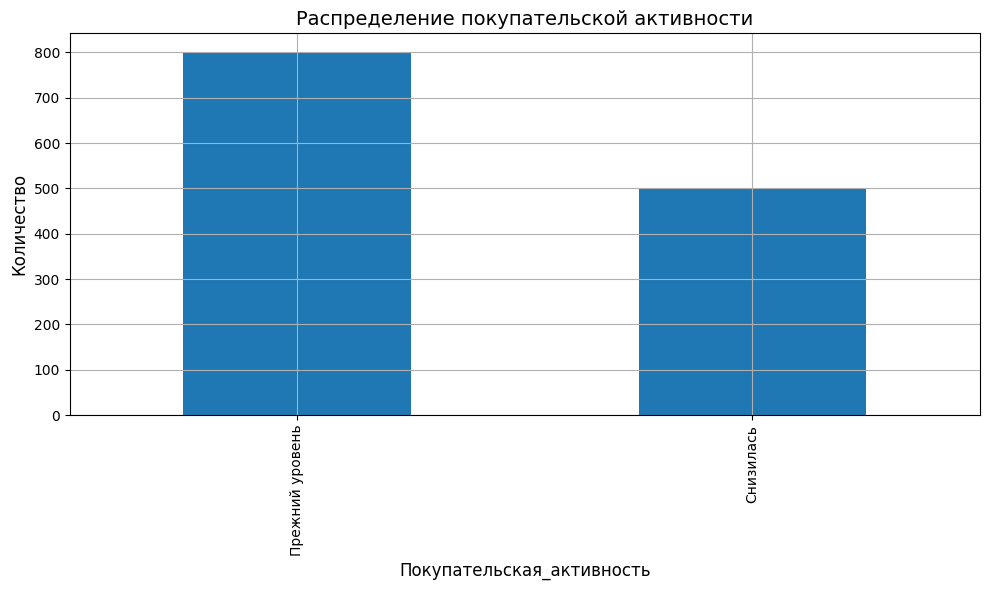

Покупательская_активность
Прежний уровень    802
Снизилась          498
Name: count, dtype: int64

In [23]:
graphik(data['Покупательская_активность'],'bar','Распределение покупательской активности', 'Покупательская_активность','Количество')
data['Покупательская_активность'].value_counts()

Видно, что прежний уровень в 1,5 раза больше чем количество снизилось

In [24]:
def histogram(df, x, hue=None, bins=50, figsize=(12, 6),rotate_labels=None):
    plt.figure(figsize=figsize)
    sns.histplot(
        data=df,
        x=x,
        hue=hue,
        bins=bins
    )
    plt.grid(True)
    plt.title(f'Гистограмма для {x}', fontsize=14)
    plt.xlabel(x, fontsize=12)
    plt.ylabel('Количество', fontsize=12)
    plt.xticks(rotation=rotate_labels)
    plt.tight_layout() 
    plt.show()
    

Видно, что прежний уровень в 1,5 раза больше чем количество снизилось

Столбец Тип_сервиса

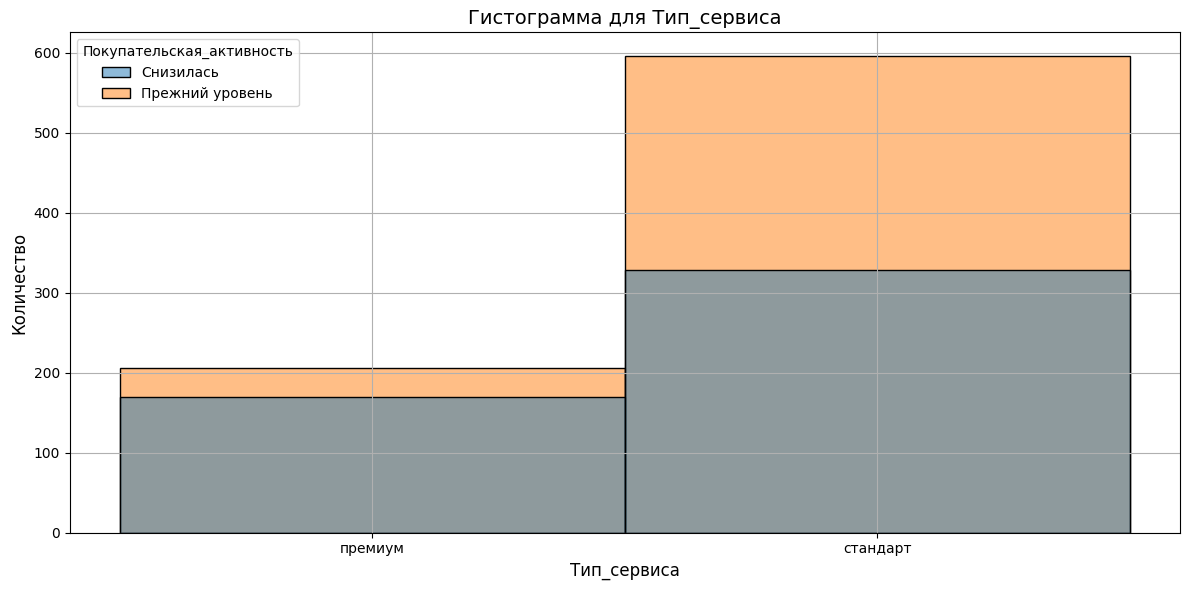

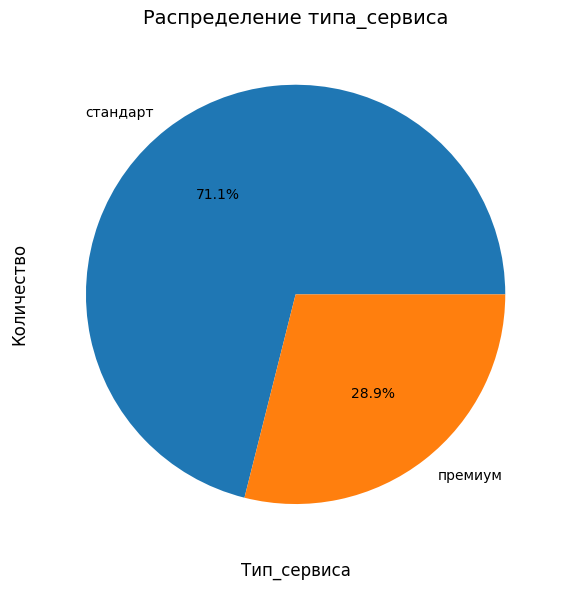

Тип_сервиса
стандарт    924
премиум     376
Name: count, dtype: int64

In [25]:
histogram(data,'Тип_сервиса','Покупательская_активность')
graphik(data['Тип_сервиса'],'pie','Распределение типа_сервиса', 'Тип_сервиса','Количество')
data['Тип_сервиса'].value_counts()

Стандарт значительно преобладает над премиум. В стандарте покупательская активность прежний уровень VS снизилась, 600 VS 320,в премиуме 205 VS 170. Снизили свою активность в процентном соотношении больше пользователя с типом сервиса преимум.

Столбец Разрешить_сообщать

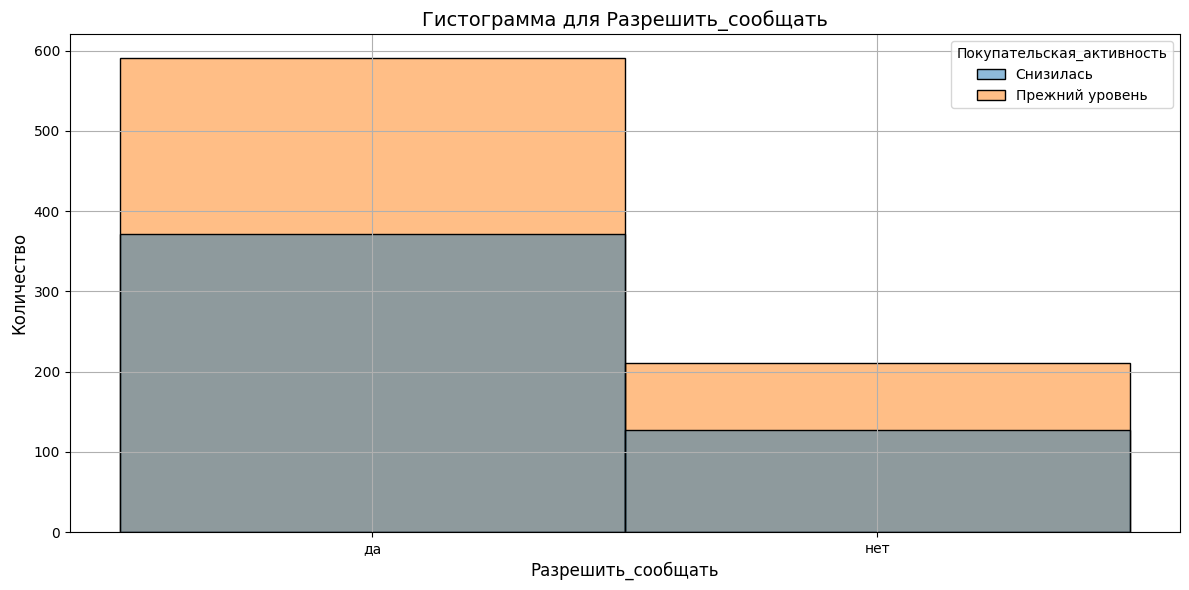

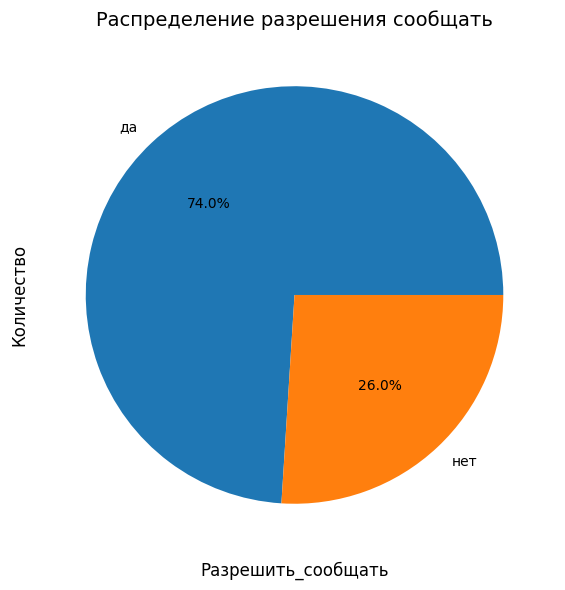

Разрешить_сообщать
да     962
нет    338
Name: count, dtype: int64

In [26]:
histogram(data,'Разрешить_сообщать','Покупательская_активность')
graphik(data['Разрешить_сообщать'],'pie','Распределение разрешения сообщать', 'Разрешить_сообщать','Количество')

data['Разрешить_сообщать'].value_counts()

Да значительно преобладает над нет.В ДА покупательская активность прежний уровень VS снизилась, 600 VS 360,в НЕТ 205 VS 120. Снизили свою активность в процентном соотношении примерно одинаково.

Столбец Маркет_актив_6_мес

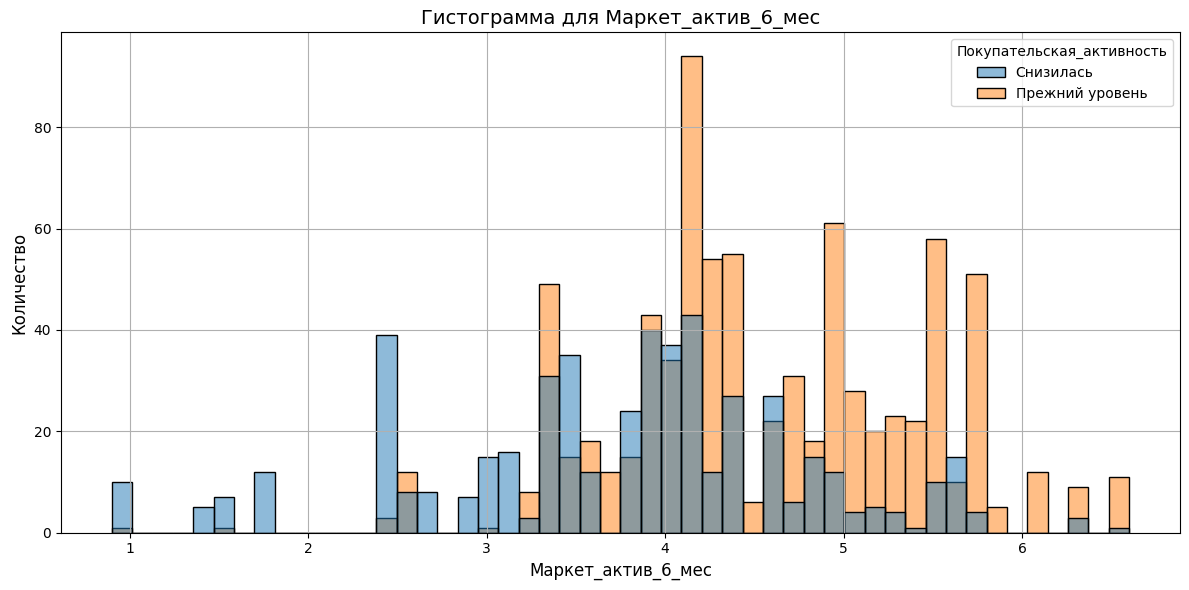


Описательная статистика для Маркет_актив_6_мес:


count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: Маркет_актив_6_мес, dtype: float64

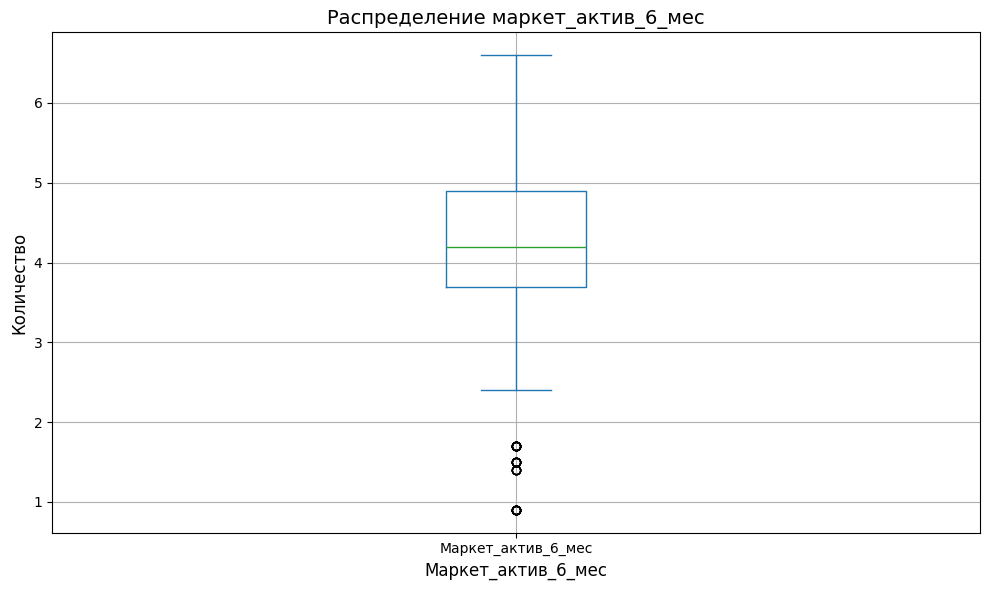

In [27]:
histogram(data,'Маркет_актив_6_мес','Покупательская_активность')

graphik(data['Маркет_актив_6_мес'],'box','Распределение маркет_актив_6_мес',
        'Маркет_актив_6_мес','Количество',describe_check=True)

Есть выбросы,среднее значние 4. Чем больше маркет, тем активность больше у прежнего уровня чем снизилась. Получается маркет влияет на активность.

Стобец Маркет_актив_тек_мес

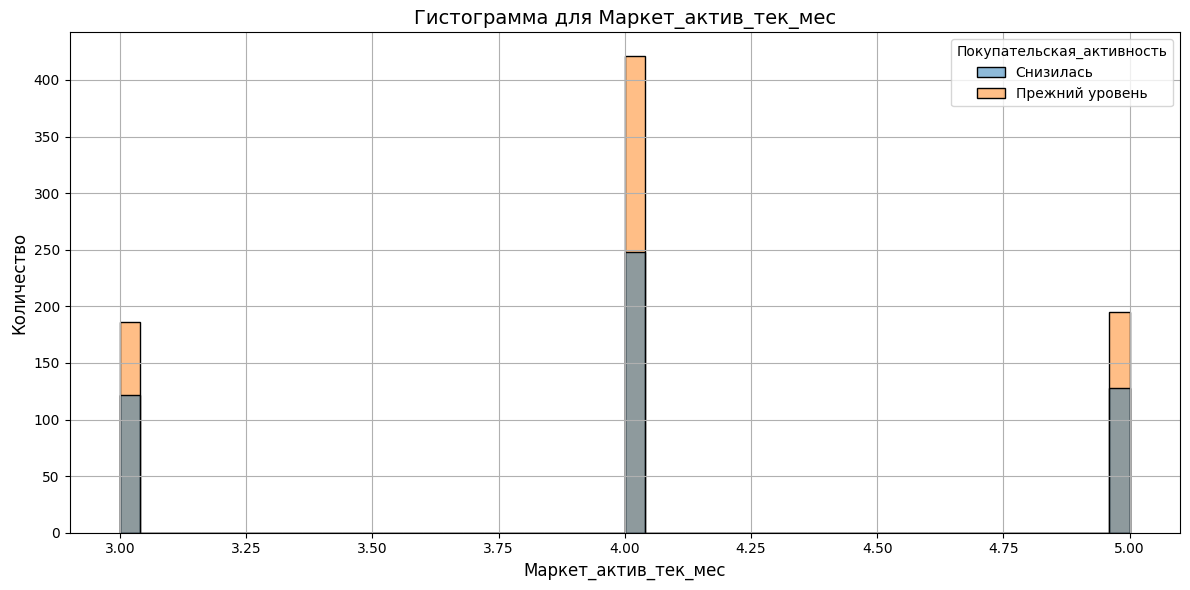


Описательная статистика для Маркет_актив_тек_мес:


count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Маркет_актив_тек_мес, dtype: float64

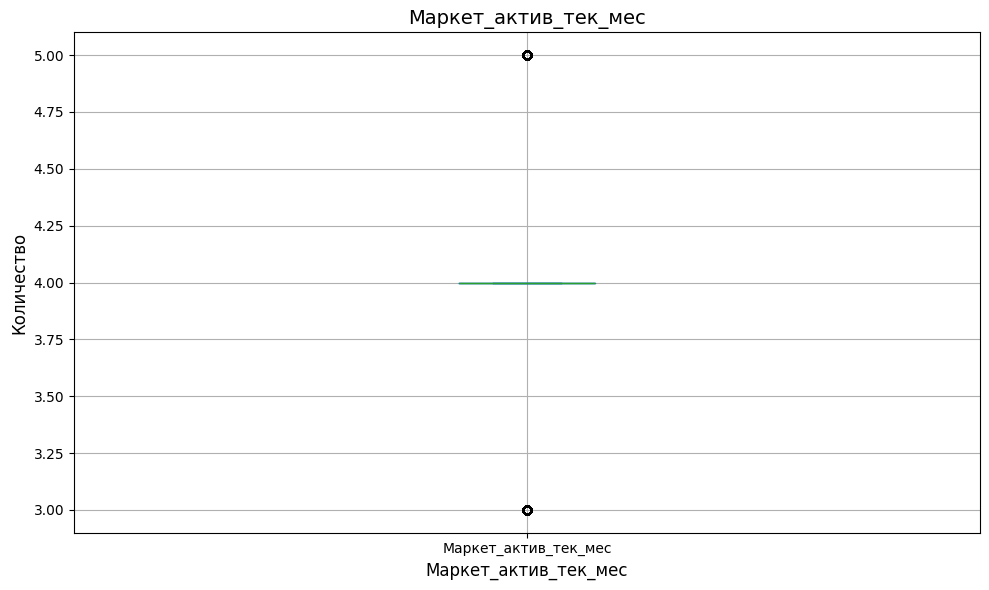

In [28]:
histogram(data,'Маркет_актив_тек_мес','Покупательская_активность')

graphik(data['Маркет_актив_тек_мес'],'box','Маркет_актив_тек_мес', 'Маркет_актив_тек_мес','Количество',describe_check=True)

Маркет_актив_тек_мес иммет дискретные значения, самое популярное 4. В текущем меясце отношение прежднего уровня к снизилась не зависит от количество маркета.

Столбец длительность

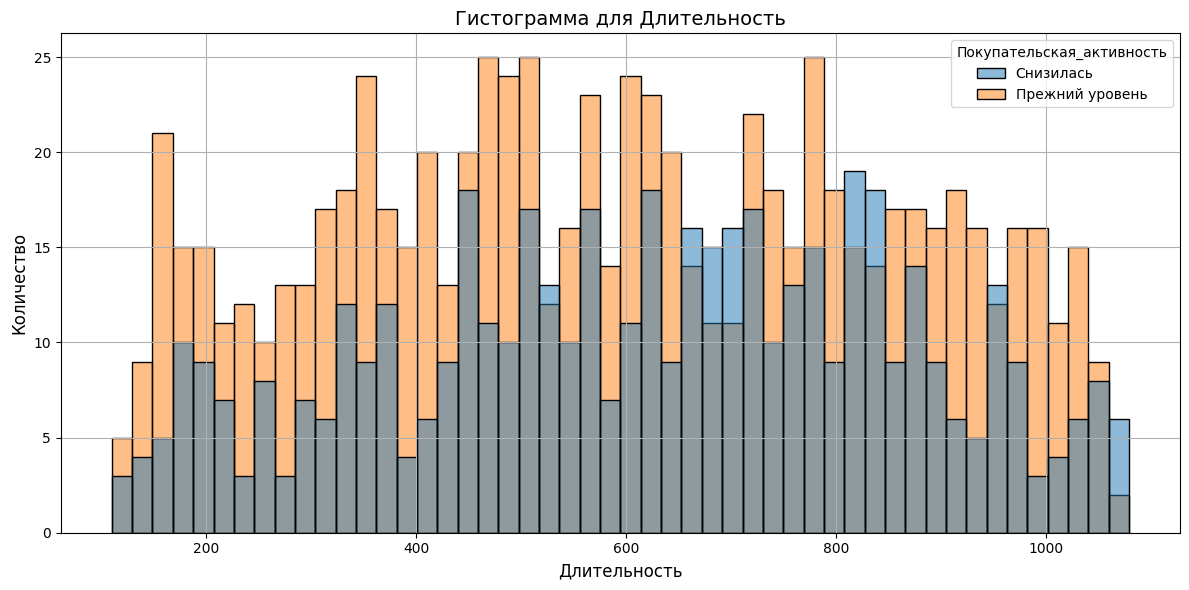


Описательная статистика для Длительность:


count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: Длительность, dtype: float64

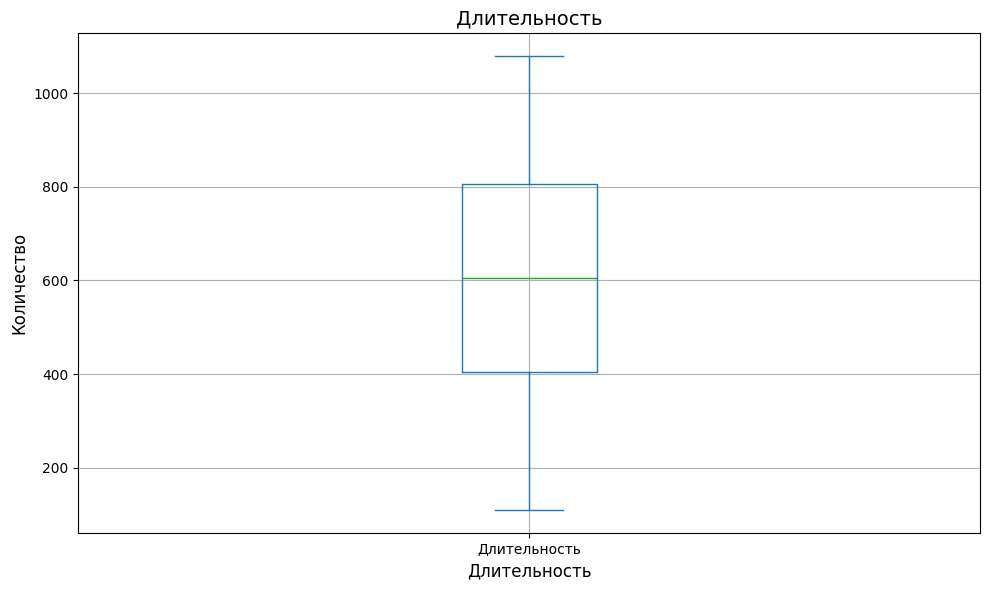

In [29]:
histogram(data,'Длительность','Покупательская_активность')
graphik(data['Длительность'],'box','Длительность', 'Длительность','Количество',describe_check=True)

Видно основаная масса пользователей зарегистрировались больше года назад. Четко зависимости активности от длительности не наблюдается.

Акционные_покупки

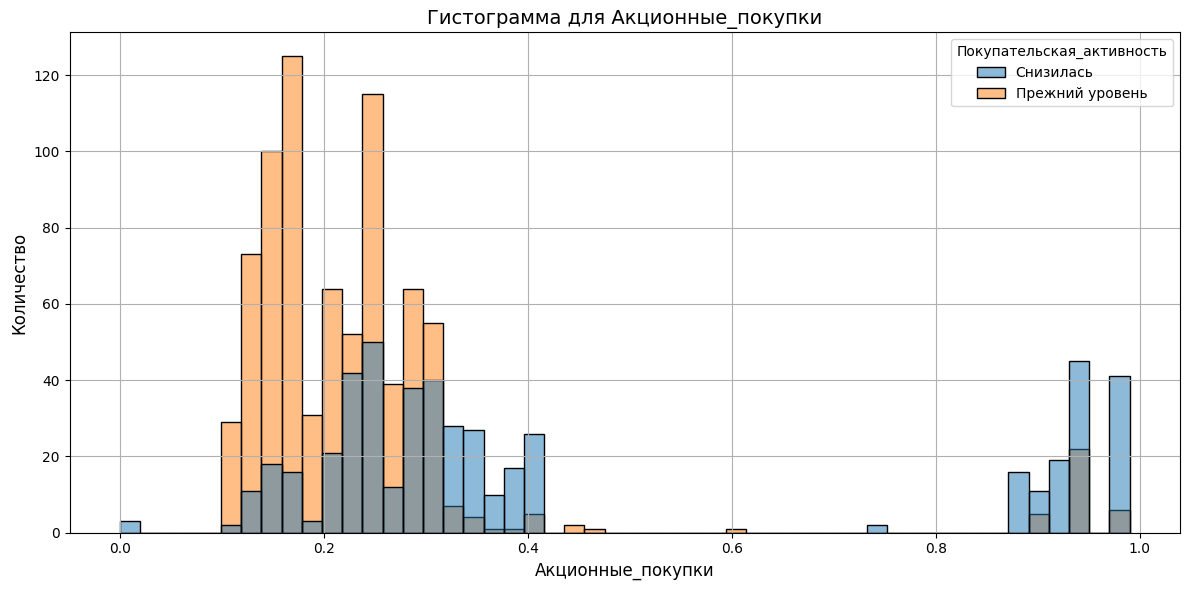


Описательная статистика для Акционные_покупки:


count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: Акционные_покупки, dtype: float64

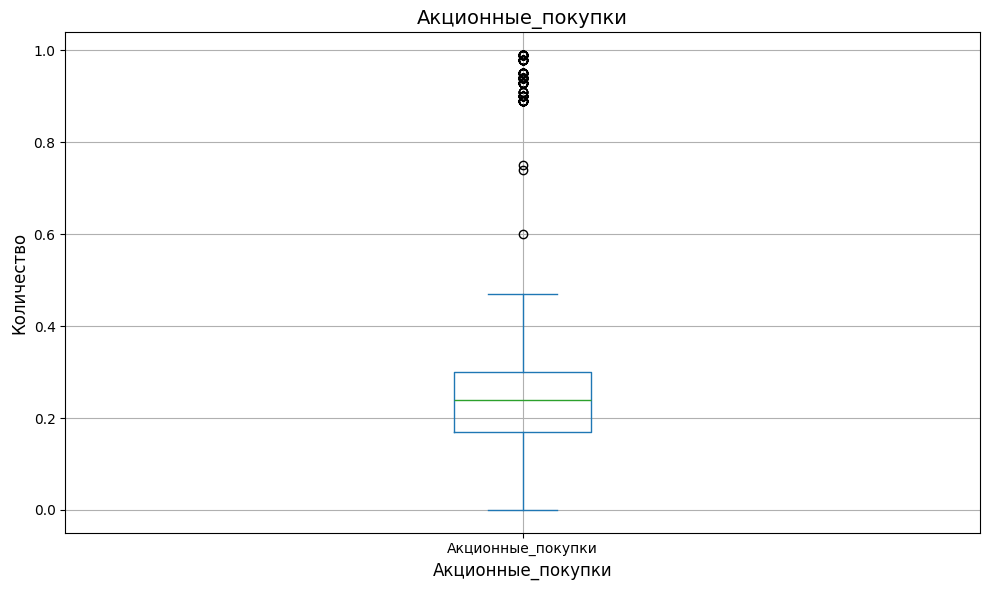

In [30]:
histogram(data,'Акционные_покупки','Покупательская_активность')
graphik(data['Акционные_покупки'],'box','Акционные_покупки', 'Акционные_покупки','Количество',describe_check=True)

Основаня доля покупателей покупают от 10 до 30 % по акции, но есть и покупатели, которые покупают по акции более 90 товаров по акции. У пользователей, которые покупают товар в основном по скидкам (больше 0,8), имеею снижение активности. Также есть снижения у пользователей с долей акционных покупок от 0,3-0,4. Возможно есть персональные акции и скидка на первые заказы.

Популярная_категория

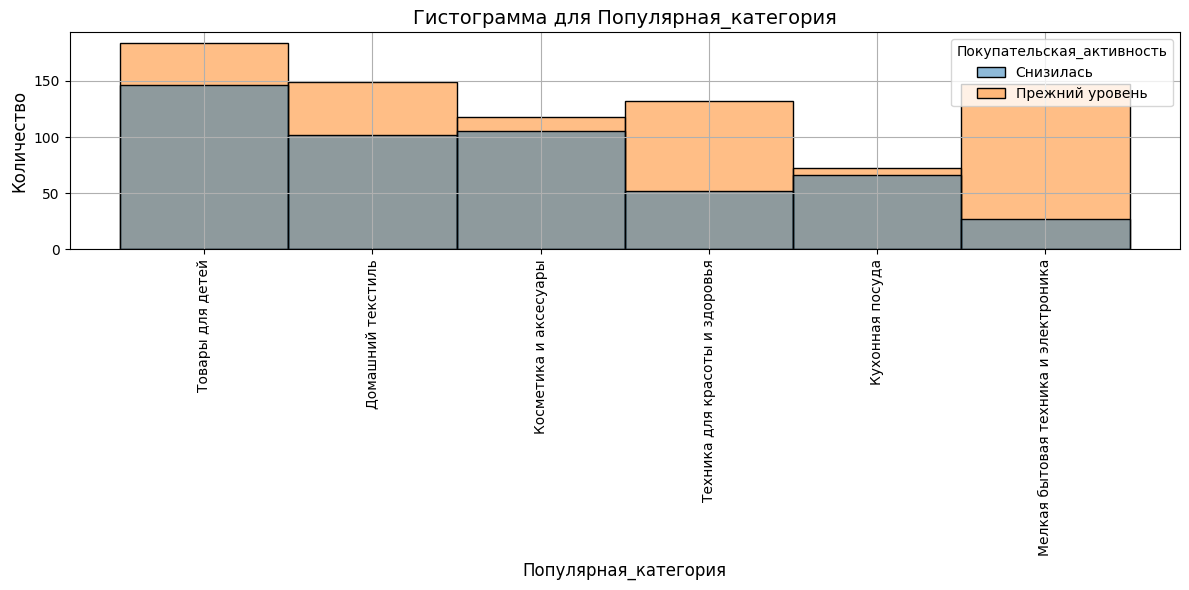

Популярная_категория
Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: count, dtype: int64

In [31]:
histogram(data,'Популярная_категория','Покупательская_активность',rotate_labels=90)
data['Популярная_категория'].value_counts()

Самая популярная категория товары для детей, самая не поппулярная кухонная посуда. Больше всего снижение произошло в категориях кухонная посуда, косметика и аксесуары. Это связано, что эта группа товаров по сравненю с другим не такая важная, косметиака и посуда могут подаждать акции. Мелкая техника нужна сейчас.

Средний_просмотр_категорий_за_визит

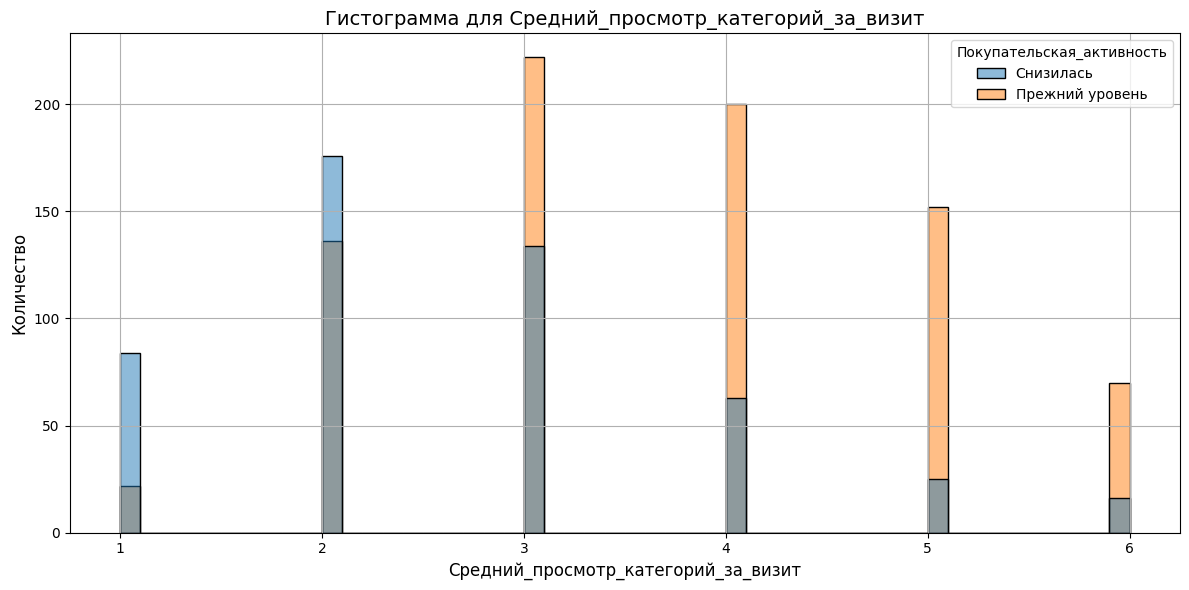


Описательная статистика для Средний_просмотр_категорий_за_визит:


count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: Средний_просмотр_категорий_за_визит, dtype: float64

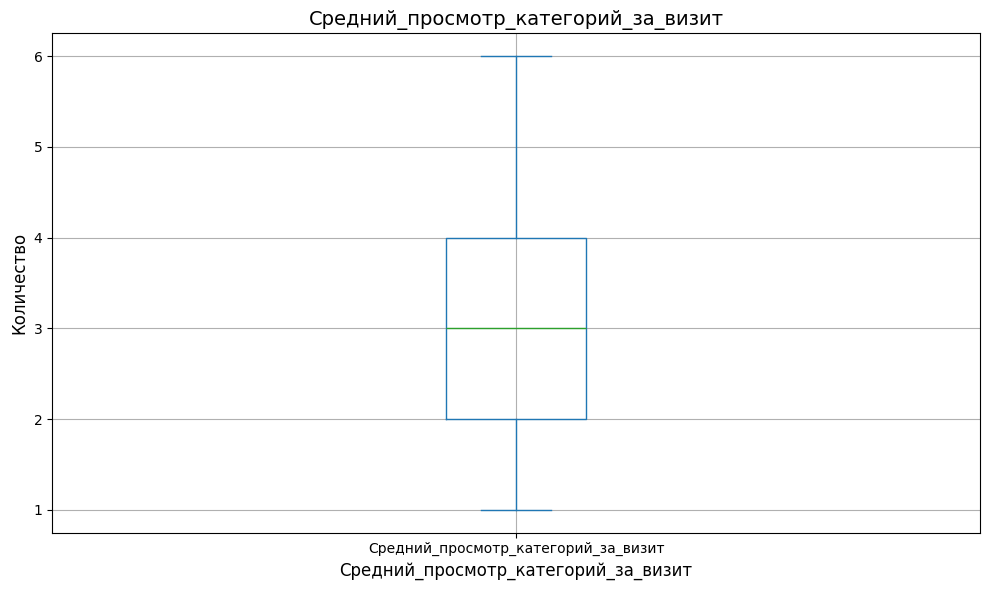

In [32]:
histogram(data,'Средний_просмотр_категорий_за_визит','Покупательская_активность')
graphik(data['Средний_просмотр_категорий_за_визит'],'box','Средний_просмотр_категорий_за_визит', 
        'Средний_просмотр_категорий_за_визит','Количество',describe_check=True)

В среднем пользователи делают 3 просмотра. Чем больше посмотров тем больше соотношение прежний уровень снизилась. Чем больше посмотрят тем больше купят.

Столбец неоплаченные_продукты_штук_квартал

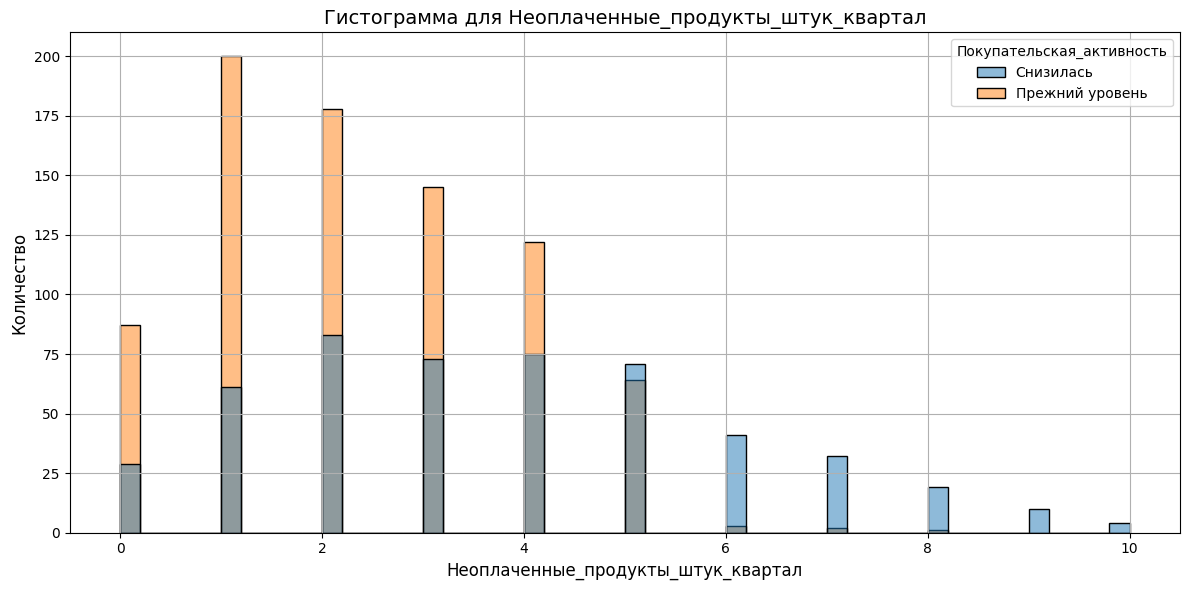


Описательная статистика для Средний_просмотр_категорий_за_визит:


count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: Неоплаченные_продукты_штук_квартал, dtype: float64

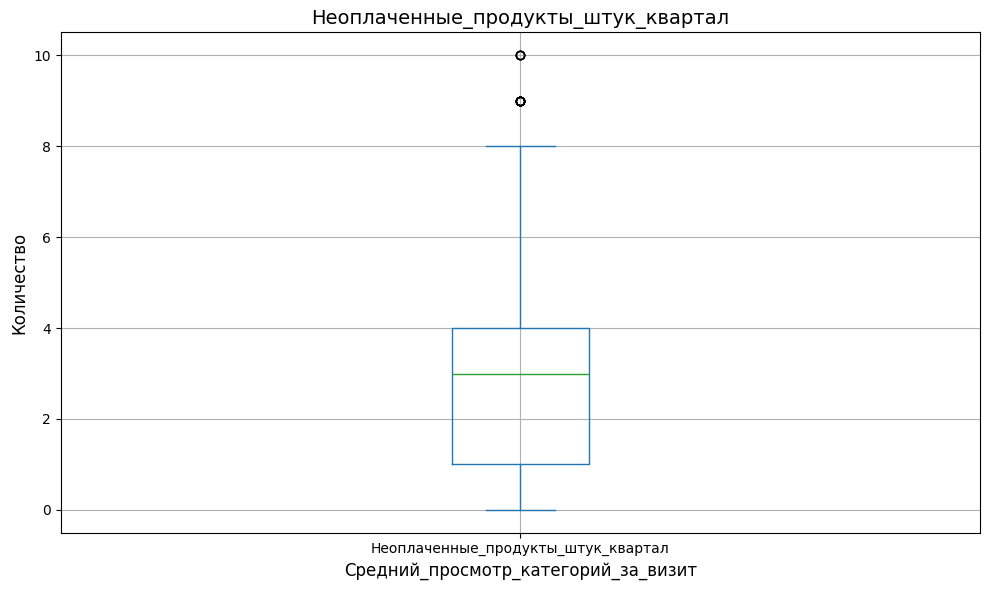

In [33]:
histogram(data,'Неоплаченные_продукты_штук_квартал','Покупательская_активность')
graphik(data['Неоплаченные_продукты_штук_квартал'],'box','Неоплаченные_продукты_штук_квартал', 
        'Средний_просмотр_категорий_за_визит','Количество',describe_check=True)

В болинстве случиях пользователи держат около 3 продуктов в корзине. Чем меньше товаров в корзине, чем больше соотношение прежний уровень снизилась. Чем меньше товаров тем больше активность.

Стобец ошибка_сервиса

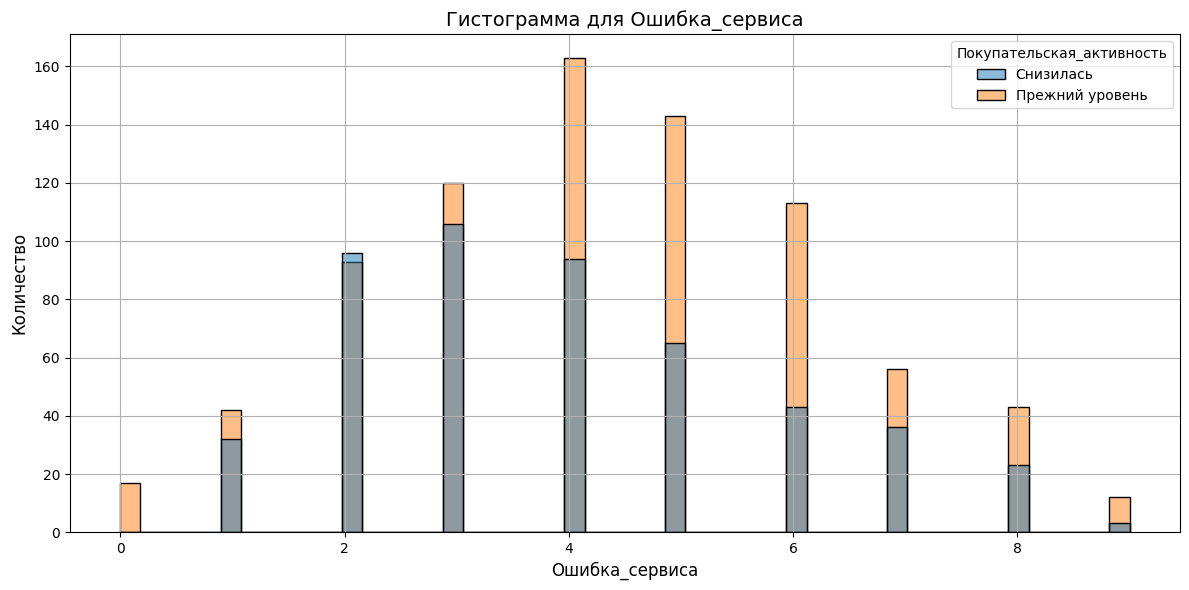


Описательная статистика для Ошибка_сервиса:


count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: Ошибка_сервиса, dtype: float64

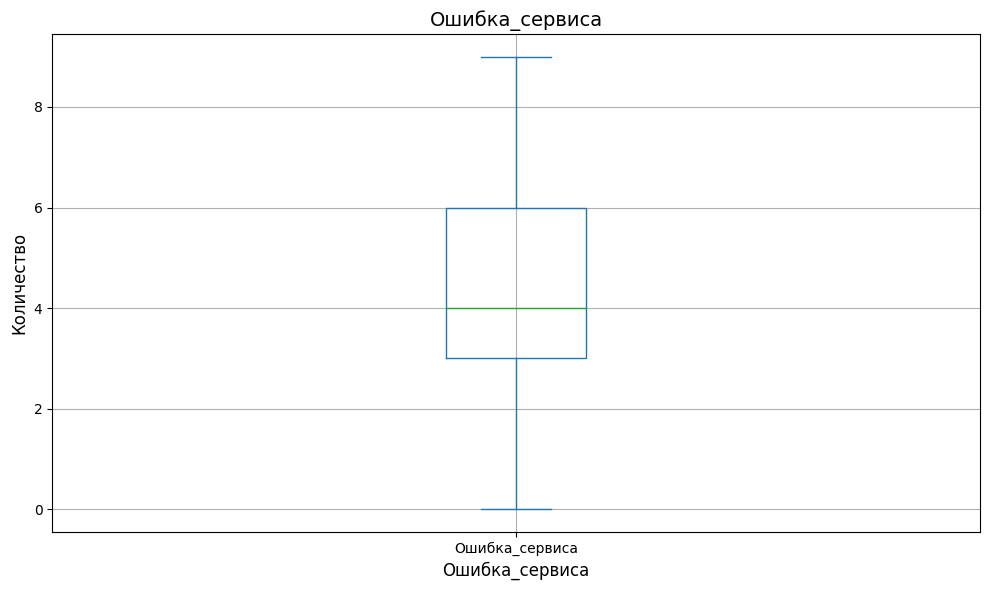

In [34]:
histogram(data,'Ошибка_сервиса','Покупательская_активность')
graphik(data['Ошибка_сервиса'],'box','Ошибка_сервиса', 'Ошибка_сервиса',
        'Количество',describe_check=True,)

3,4 ошибки самые популярные. Нет зависимости активности от количество ошибок.

Столбец Страниц_за_визит

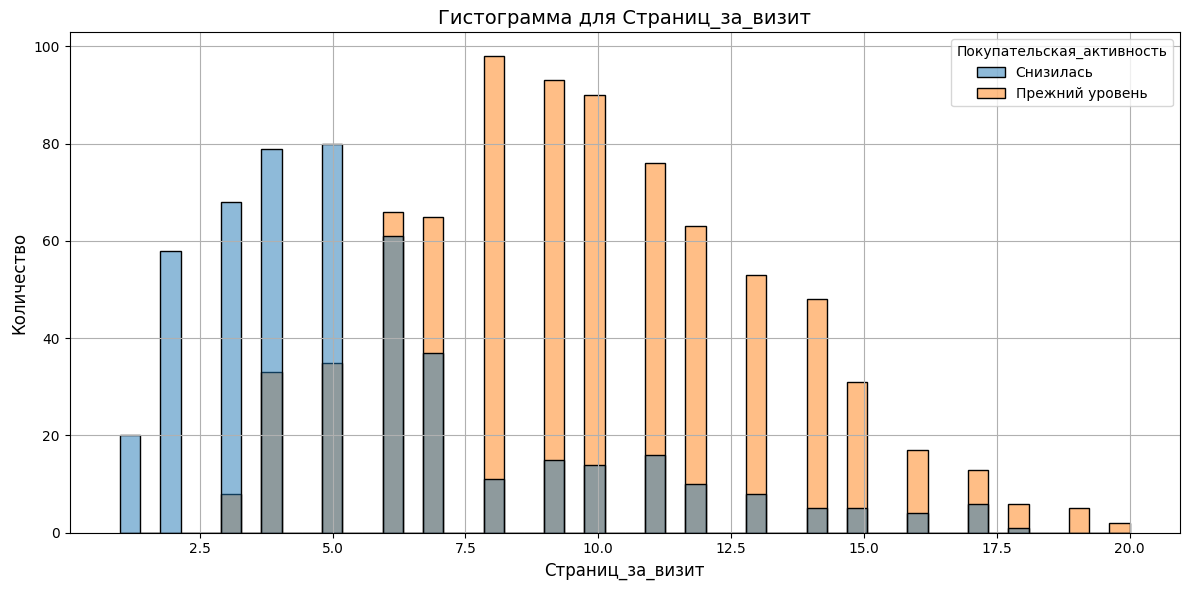


Описательная статистика для Страниц_за_визит:


count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: Страниц_за_визит, dtype: float64

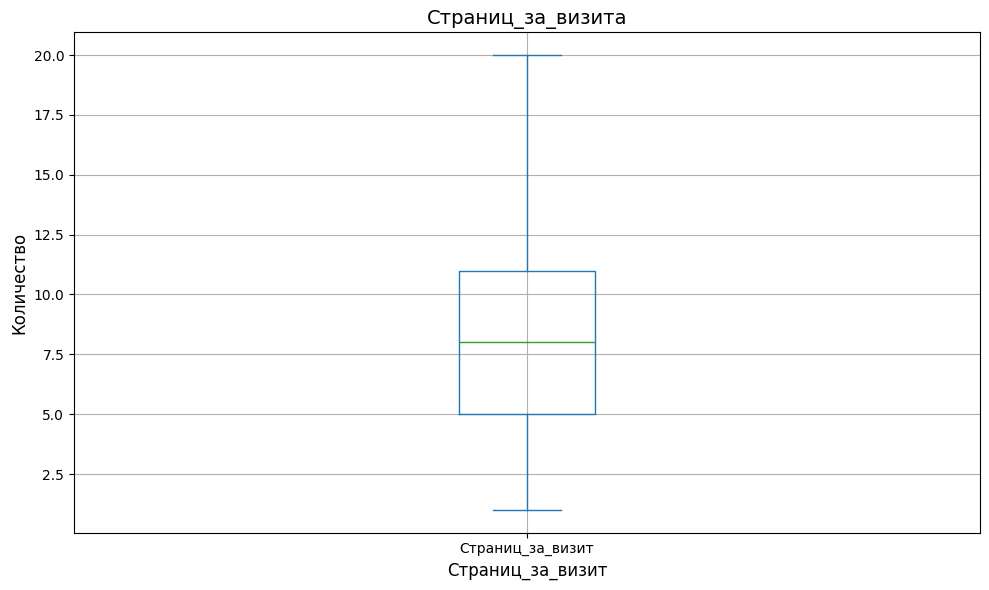

In [35]:
histogram(data,'Страниц_за_визит','Покупательская_активность'),
graphik(data['Страниц_за_визит'],'box','Страниц_за_визита', 
        'Страниц_за_визит','Количество',describe_check=True)

В среднем пользователь просматривает 8 страниц. Четко видно, что после 6 и более просмотров страниц прежнего уровня становит в разы больше по сранвнению с снизилось. Чем больше смотят страниц, тем больше покупают.

Файл time

In [36]:
time

id            Период  Минут
0     215348     текущий_месяц     14
1     215348  предыдущий_месяц     13
2     215349     текущий_месяц     10
3     215349  предыдущий_месяц     12
4     215350     текущий_месяц     13
...      ...               ...    ...
2595  216645     текущий_месяц     18
2596  216646  предыдущий_месяц     18
2597  216646     текущий_месяц      7
2598  216647     текущий_месяц     10
2599  216647  предыдущий_месяц     15

[2600 rows x 3 columns]

Период

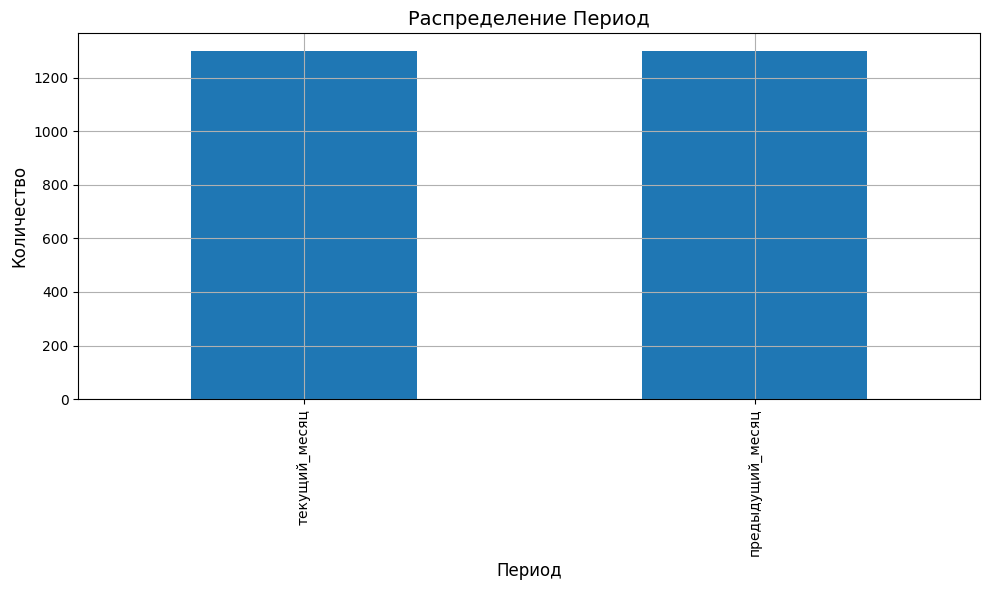

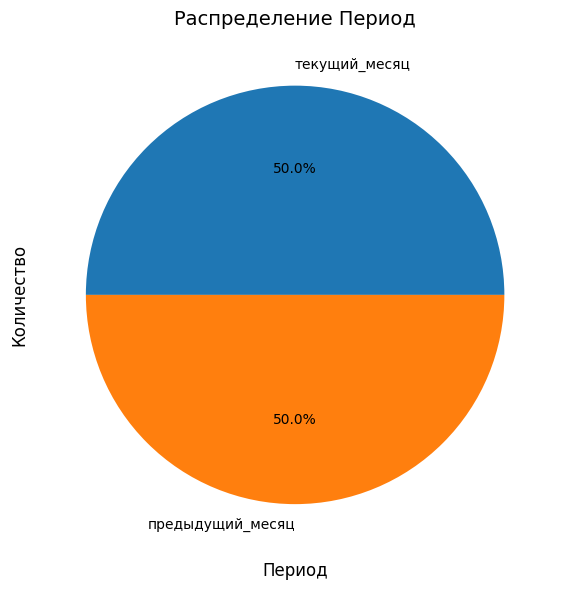

In [37]:
graphik(time['Период'],'bar','Распределение Период', 'Период','Количество',
        bins=20)
graphik(time['Период'],'pie','Распределение Период', 'Период','Количество')

Текущий и предыдущий месяца одинаковое по количеству

Столбец Минут


Описательная статистика для Минут:


count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: Минут, dtype: float64

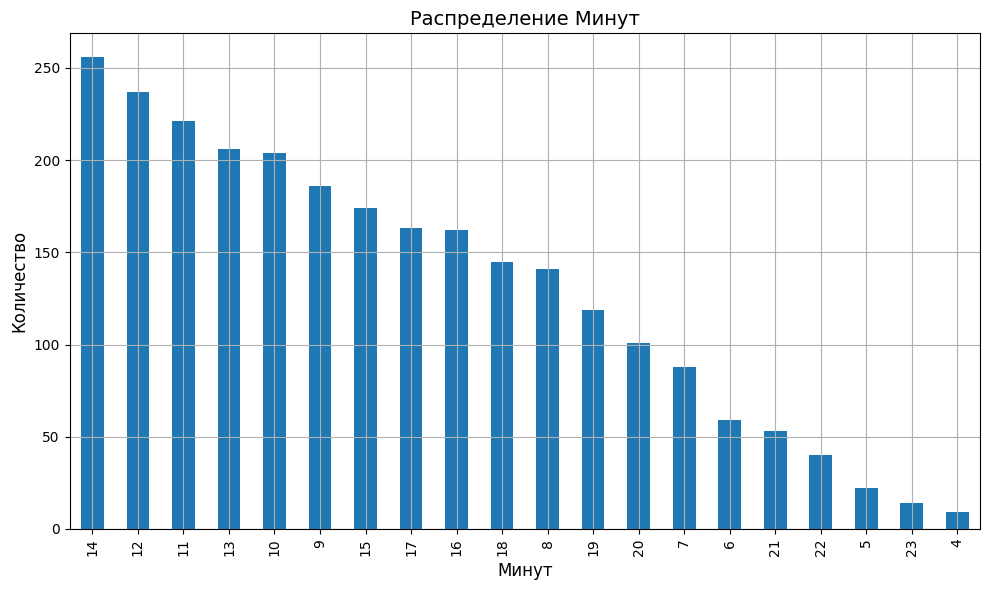

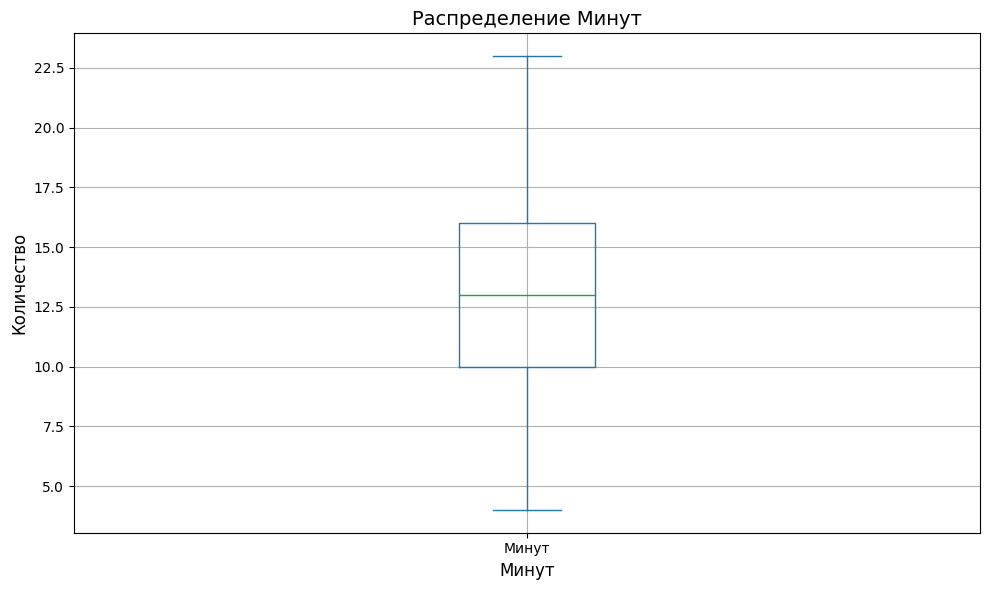

In [38]:
graphik(time['Минут'],'bar','Распределение Минут', 
    'Минут','Количество',describe_check=True)
graphik(time['Минут'],'box','Распределение Минут', 'Минут','Количество')

Среднее количество визитов просмотра 13

In [39]:
market_money

id               Период  Выручка
0     215348  препредыдущий_месяц      0.0
1     215348        текущий_месяц   3293.1
2     215348     предыдущий_месяц      0.0
3     215349  препредыдущий_месяц   4472.0
4     215349        текущий_месяц   4971.6
...      ...                  ...      ...
3895  216646  препредыдущий_месяц   4725.0
3896  216646     предыдущий_месяц   4923.0
3897  216647     предыдущий_месяц   4720.0
3898  216647  препредыдущий_месяц   5183.0
3899  216647        текущий_месяц   4448.3

[3899 rows x 3 columns]

Столбец период

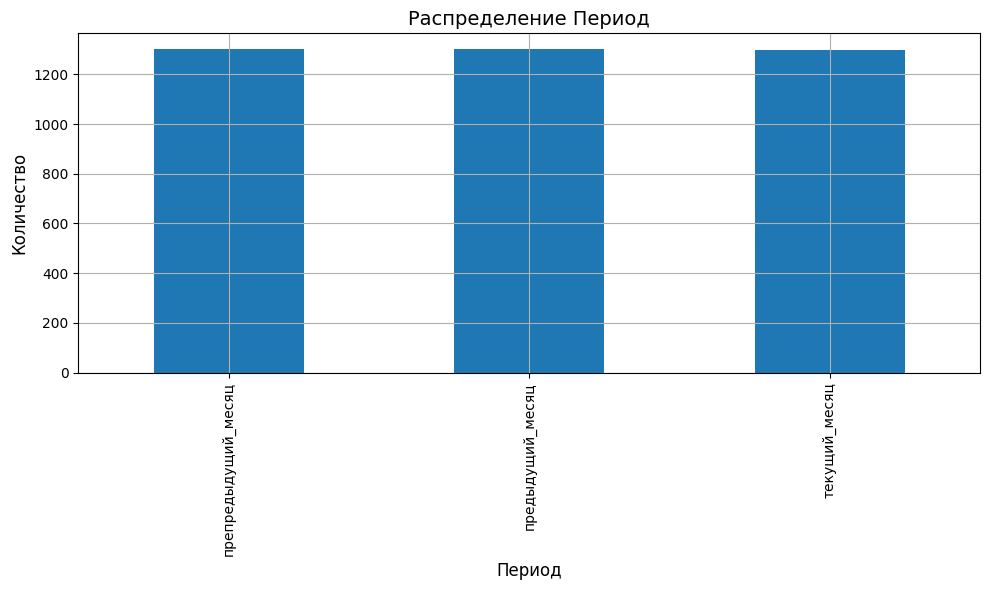

In [40]:
graphik(market_money['Период'],'bar','Распределение Период', 'Период','Количество',
        bins=20)

Периоды поделены равно на 3 части

Столбец выручка


Описательная статистика для Выручка:


count    3899.00000
mean     4999.57743
std       706.99988
min         0.00000
25%      4590.10000
50%      4957.00000
75%      5363.00000
max      7799.40000
Name: Выручка, dtype: float64

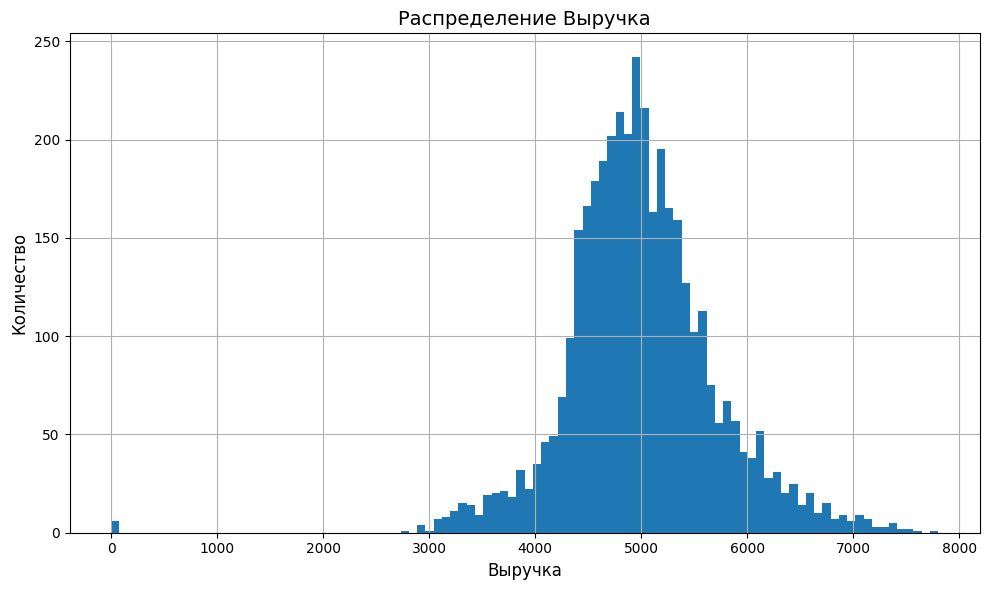

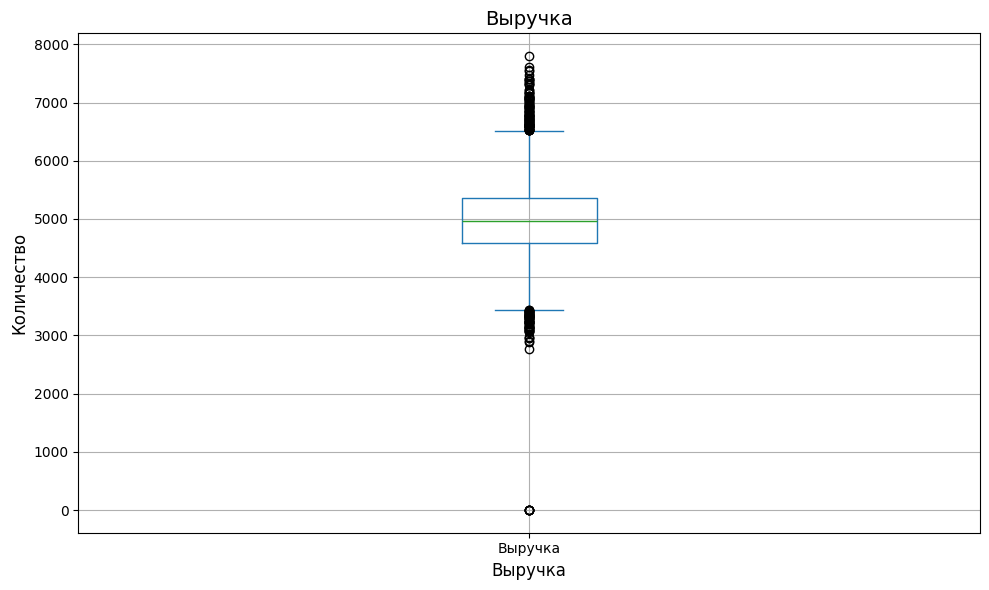

In [41]:
graphik(market_money['Выручка'],'hist','Распределение Выручка', 
    'Выручка','Количество',bins=100,describe_check=True)
graphik(market_money['Выручка'],'box','Выручка', 'Выручка','Количество')

Есть ноль удалим его, среднее значение 5000.Распределение близкое к нормальному.

In [42]:
market_money=market_money.loc[market_money['Выручка']>0]

Файл money


Описательная статистика для Прибыль:


count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: Прибыль, dtype: float64

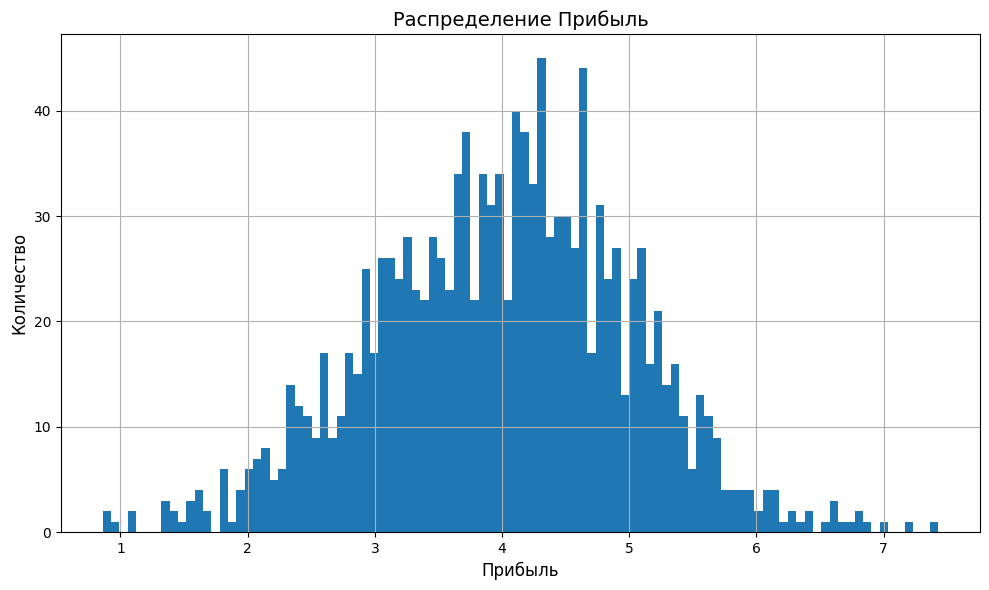

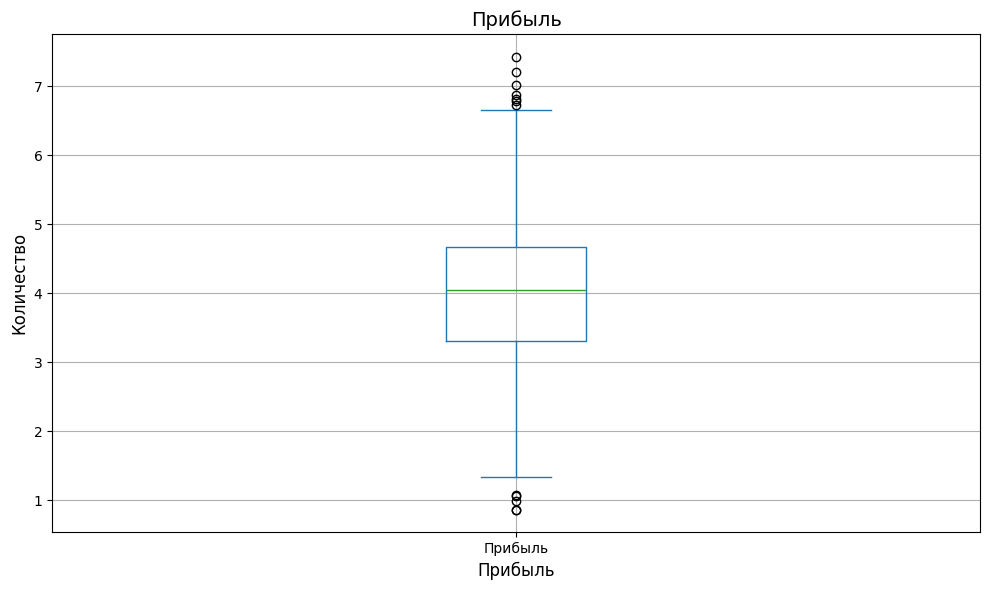

In [43]:
graphik(money['Прибыль'],'hist','Распределение Прибыль', 
    'Прибыль','Количество',bins=100,describe_check=True)
graphik(money['Прибыль'],'box','Прибыль', 'Прибыль','Количество')

Среднее значение прибыли 4. Распределение близкое к нормальному.

In [44]:
market_money.head(5)

id               Период  Выручка
1  215348        текущий_месяц   3293.1
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6
5  215349     предыдущий_месяц   5216.0
6  215350  препредыдущий_месяц   4826.0

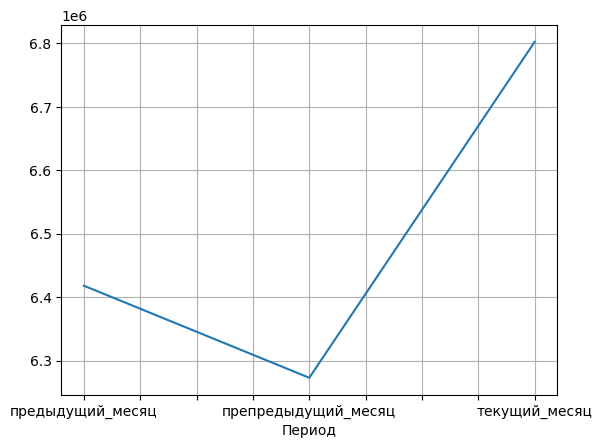

In [45]:
market_money.groupby('Период')['Выручка'].sum().plot(kind='line', grid=True)
plt.show()

В текущем месяце выручка больше, чем в остальных месяцах.

После того как мы исселодовали данные, нужно отобрать клиентов с активностью не менее трех месяцов. Это значит, что нам нужны записи из market_money, где у клиента есть покупки за все три периода 'препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'.

In [46]:
group_counts=market_money.groupby('id')['Период'].count()# сортируем по количеству месяцев
ids_with_3_entries = group_counts[group_counts == 3].index#сортируем id где есть 3 меясца
market_money = market_money[market_money['id'].isin(ids_with_3_entries)]# Фильтруем исходный DataFrame
print(len(market_money['id'].unique()))#Проверяем количество уникальных id

1296


Отфильтровалось всего 4 записи.

Сделаем новые столбцы 'Выручка_пред_месяц', 'Выручка_препред_месяц', 'Выручка_тек_месяц'

In [47]:
market_money = pd.pivot_table(market_money, index='id', columns='Период')
market_money['total']=market_money.sum(axis=1)
market_money.columns = ['Выручка_пред_месяц', 'Выручка_препред_месяц', 'Выручка_тек_месяц', 'total']
market_money = market_money.reset_index()
market_money.head()

id  Выручка_пред_месяц  Выручка_препред_месяц  Выручка_тек_месяц  \
0  215349              5216.0                 4472.0             4971.6   
1  215350              5457.5                 4826.0             5058.4   
2  215351              6158.0                 4793.0             6610.4   
3  215352              5807.5                 4594.0             5872.5   
4  215353              4738.5                 5124.0             5388.5   

     total  
0  14659.6  
1  15341.9  
2  17561.4  
3  16274.0  
4  15251.0

<b>Вывод:</b>

На данном этапе был выполнен исследовательский анализ данных. В процессе работы:

1.Были выявлены и исправлены ошибки в данных, включая опечатки, которые хорошо визуализировались на построенных графиках распределений.

2.Обнаружено незначительное количество явных аномалий - такие выбросы были исключены из дальнейшего анализа для повышения качества данных.

3.Проведенная проверка показала, что в целом данные имеют хорошее качество и пригодны для анализа.

4.Стоит обратить внимание на акционные товары,тк с их увелчением уровень активности снижается.

5.В выборку включены только активные пользователи - те, кто совершал покупки в течение последнего квартала (3 месяцев). 

6.Портрет покупателя.
 Женщина с ребенком 25-40 лет.
 Закупается по акции с конкретными потребностями с конкретным товаром.
 Не тратят время на поиск – знают, что хотят, быстро кладут в корзину и ждут скидку
 Лояльны к рассылкам (не отписываются, разрешают уведомления).
 Часть из них – премиум-пользователи (готовы платить за удобство).


Таким образом, данные были очищены и подготовлены для последующего углубленного анализа и построения моделей.

<b>4.Объединение таблиц</b>

Теперь объеденим данные из датафреймов market_file, market_money, market_time в одну таблицу.

In [48]:
data.head(5)

id Покупательская_активность Тип_сервиса Разрешить_сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась    стандарт                нет   
3  215351                 Снизилась    стандарт                 да   
4  215352                 Снизилась    стандарт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

In [49]:
time.head(5)

id            Период  Минут
0  215348     текущий_месяц     14
1  215348  предыдущий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдущий_месяц     12
4  215350     текущий_месяц     13

In [50]:
time_pivot = pd.pivot_table(
    time,
    index='id',          
    columns='Период',     
    values='Минут'       
)

# Переименовываем столбцы
time_pivot.columns = ['Минут_предыдущий_месяц', 'Минут_текущий_месяц']

# Сбрасываем индекс, чтобы 'id' снова стал колонкой (опционально)
time_pivot = time_pivot.reset_index()
time_pivot.head(5)


id  Минут_предыдущий_месяц  Минут_текущий_месяц
0  215348                    13.0                 14.0
1  215349                    12.0                 10.0
2  215350                     8.0                 13.0
3  215351                    11.0                 13.0
4  215352                     8.0                 11.0

Объединим таблицы

In [51]:
data=data.merge(time_pivot,on='id', how='inner')
data_full=data.merge(market_money.drop('total',axis=1),on='id', how='inner')
data_full

id Покупательская_активность Тип_сервиса Разрешить_сообщать  \
0     215349                 Снизилась     премиум                 да   
1     215350                 Снизилась    стандарт                нет   
2     215351                 Снизилась    стандарт                 да   
3     215352                 Снизилась    стандарт                нет   
4     215353                 Снизилась    стандарт                 да   
...      ...                       ...         ...                ...   
1291  216643           Прежний уровень    стандарт                 да   
1292  216644           Прежний уровень    стандарт                нет   
1293  216645           Прежний уровень    стандарт                 да   
1294  216646           Прежний уровень    стандарт                 да   
1295  216647           Прежний уровень     премиум                 да   

      Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
0                    4.4                     4           819   
1                    4.9                     3           539   
2                    3.2                     5           896   
3                    5.1                     3          1064   
4                    3.3                     4           762   
...                  ...                   ...           ...   
1291                 6.6                     3           318   
1292                 5.1                     4           454   
1293                 4.1                     3           586   
1294                 6.3                     5           645   
1295                 4.0                     5           906   

      Акционные_покупки            Популярная_категория  \
0                  0.75                Товары для детей   
1                  0.14               Домашний текстиль   
2                  0.99                Товары для детей   
3                  0.94                Товары для детей   
4                  0.26               Домашний текстиль   
...                 ...                             ...   
1291               0.24  Техника для красоты и здоровья   
1292               0.21               Домашний текстиль   
1293               0.20               Домашний текстиль   
1294               0.12  Техника для красоты и здоровья   
1295               0.94  Техника для красоты и здоровья   

      Средний_просмотр_категорий_за_визит  Неоплаченные_продукты_штук_квартал  \
0                                       4                                   4   
1                                       5                                   2   
2                                       5                                   0   
3                                       3                                   2   
4                                       4                                   1   
...                                   ...                                 ...   
1291                                    5                                   3   
1292                                    6                                   2   
1293                                    3                                   2   
1294                                    3                                   3   
1295                                    4                                   5   

      Ошибка_сервиса  Страниц_за_визит  Минут_предыдущий_месяц  \
0                  2                 5                    12.0   
1                  1                 5                     8.0   
2                  6                 4                    11.0   
3                  3                 2                     8.0   
4                  1                 4                    10.0   
...              ...               ...                     ...   
1291               3                11                    14.0   
1292               3                 9                    12.0   
1293               5                 7                    12.0   
1294               5  

Проверим объединенные данные

In [52]:
analyze_dataframe(data_full,sample_size=10)

--------------------------------------------------
📊 Анализ DataFrame: DataFrame
📏 Размер: 1296 строк, 18 колонок
--------------------------------------------------
Основная информация (.info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   Покупательская_активность            1296 non-null   object 
 2   Тип_сервиса                          1296 non-null   object 
 3   Разрешить_сообщать                   1296 non-null   object 
 4   Маркет_актив_6_мес                   1296 non-null   float64
 5   Маркет_актив_тек_мес                 1296 non-null   int64  
 6   Длительность                         1296 non-null   int64  
 7   Акционные_покупки                    1296 non-null   float64
 8   Популярная_категория              

id Покупательская_активность Тип_сервиса Разрешить_сообщать  \
0  215349                 Снизилась     премиум                 да   
1  215350                 Снизилась    стандарт                нет   
2  215351                 Снизилась    стандарт                 да   
3  215352                 Снизилась    стандарт                нет   
4  215353                 Снизилась    стандарт                 да   
5  215354                 Снизилась    стандарт                 да   
6  215355                 Снизилась    стандарт                нет   
7  215356                 Снизилась    стандарт                 да   
8  215358                 Снизилась    стандарт                 да   
9  215360                 Снизилась     премиум                 да   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 4.4                     4           819               0.75   
1                 4.9                     3           539               0.14   
2                 3.2                     5           896               0.99   
3                 5.1                     3          1064               0.94   
4                 3.3                     4           762               0.26   
5                 5.1                     3           431               0.23   
6                 4.7                     4           284               0.17   
7                 4.2                     4           192               0.14   
8                 4.7                     4           450               0.13   
9                 3.9                     3           623               0.35   

    Популярная_категория  Средний_просмотр_категорий_за_визит  \
0       Товары для детей                                    4   
1      Домашний текстиль                                    5   
2       Товары для детей                                    5   
3       Товары для детей                                    3   
4      Домашний текстиль                                    4   
5  Косметика и аксесуары                                    2   
6       Товары для детей                                    5   
7  Косметика и аксесуары                                    2   
8      Домашний текстиль                                    4   
9        Кухонная посуда                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
0                                   4               2                 5   
1                                   2               1                 5   
2                                   0               6                 4   
3                                   2               3                 2   
4                                   1               1                 4   
5                                   3               7                 2   
6                                   1               6                 4   
7                                   2               1                 3   
8                                   2               6                 4   
9                                   1               4                 7   

   Минут_предыдущий_месяц  Минут_текущий_месяц  Выручка_пред_месяц  \
0                    12.0                 10.0              5216.0   
1                     8.0                 13.0              5457.5   
2                    11.0                 13.0              6158.0   
3                     8.0                 11.0              5807.5   
4                    10.0                 10.0              4738.5   
5                    11.0                 12.0              5685.0   
6                    12.0                 10.0              3263.0   
7                     6.0                  7.0              4146.5   
8                    14.0                 10.0              3488.0   
9                     9.0                  6.0              5304.5   

   Выручка_препред_месяц  Выручка_тек_меся


 Описательная статистика (.describe):


id Покупательская_активность Тип_сервиса  \
count     1296.000000                      1296        1296   
unique            NaN                         2           2   
top               NaN           Прежний уровень    стандарт   
freq              NaN                       802         922   
mean    215999.464506                       NaN         NaN   
std        374.327860                       NaN         NaN   
min     215349.000000                       NaN         NaN   
25%     215675.750000                       NaN         NaN   
50%     215999.500000                       NaN         NaN   
75%     216323.250000                       NaN         NaN   
max     216647.000000                       NaN         NaN   

       Разрешить_сообщать  Маркет_актив_6_мес  Маркет_актив_тек_мес  \
count                1296         1296.000000           1296.000000   
unique                  2                 NaN                   NaN   
top                    да                 NaN                   NaN   
freq                  959                 NaN                   NaN   
mean                  NaN            4.256404              4.009259   
std                   NaN            1.013525              0.696316   
min                   NaN            0.900000              3.000000   
25%                   NaN            3.700000              4.000000   
50%                   NaN            4.200000              4.000000   
75%                   NaN            4.900000              4.000000   
max                   NaN            6.600000              5.000000   

        Длительность  Акционные_покупки Популярная_категория  \
count    1296.000000        1296.000000                 1296   
unique           NaN                NaN                    6   
top              NaN                NaN     Товары для детей   
freq             NaN                NaN                  329   
mean      602.967593           0.320069                  NaN   
std       249.195823           0.249159                  NaN   
min       121.000000           0.110000                  NaN   
25%       409.500000           0.170000                  NaN   
50%       606.500000           0.240000                  NaN   
75%       806.250000           0.300000                  NaN   
max      1079.000000           0.990000                  NaN   

        Средний_просмотр_категорий_за_визит  \
count                           1296.000000   
unique                                  NaN   
top                                     NaN   
freq                                    NaN   
mean                               3.267747   
std                                1.355125   
min                                1.000000   
25%                                2.000000   
50%                                3.000000   
75%                                4.000000   
max                                6.000000   

        Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
count                          1296.000000     1296.000000       1296.000000   
unique                                 NaN             NaN               NaN   
top                                    NaN             NaN               NaN   
freq                                   NaN             NaN               NaN   
mean                              2.841821        4.184414          8.187500   
std                               1.974074        1.951719          3.978459   
min                               0.000000        0.000000          1.000000   
25%                               1.000000        3.000000          5.000000   
50%                               3.000000        4.000000          8.000000   
75%                               4.000000        6.000000         11.000000   
max                              10.000000        9.000000         20.000000   

        Минут_предыдущий_месяц  Минут_текущий_месяц  Выручка_пред_месяц  \
count              1296.000000         


 Дубликаты: 0 полных дубликатов
--------------------------------------------------
Пропусков нет!

 Типы данных:


Количество колонок
int64                     7
float64                   7
object                    4

<b>Вывод по объединению таблиц:</b>

Данные из датафреймов data, market_money и market_time были объединены в одну таблицу по общему столбцу - 'id' пользователя. Размерность, пропуски и типы данных были проверены.

<b>5. Корреляционный анализ</b>

Построим матрицу корреляции

interval columns not set, guessing: ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'Минут_предыдущий_месяц', 'Минут_текущий_месяц', 'Выручка_пред_месяц', 'Выручка_препред_месяц', 'Выручка_тек_месяц']


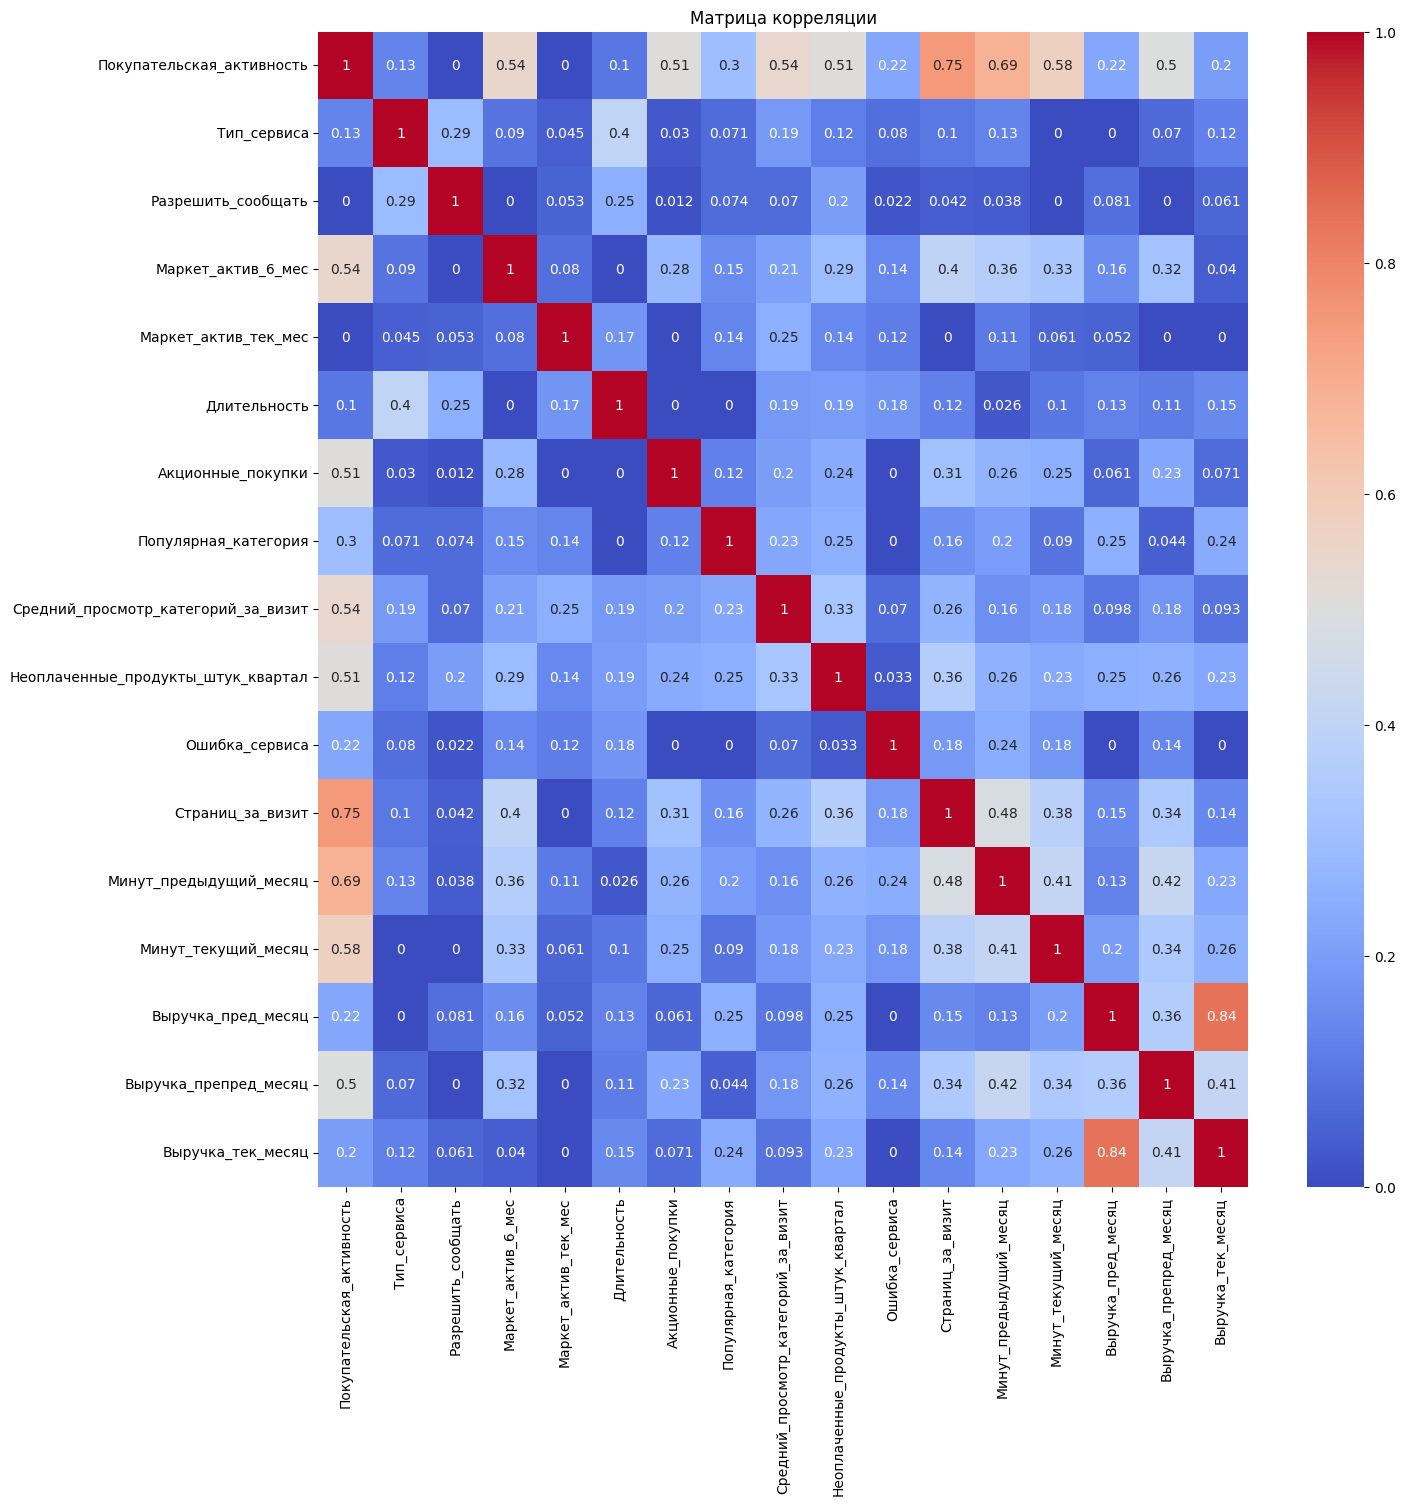

In [53]:
corr_matrix = data_full.drop('id',axis=1).phik_matrix()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

С таргетом высокую корелляцию имеют с страница за визит,минут_предыдущий месяц.

Построим матрицы корреляции для значений целевого признака отдельно.

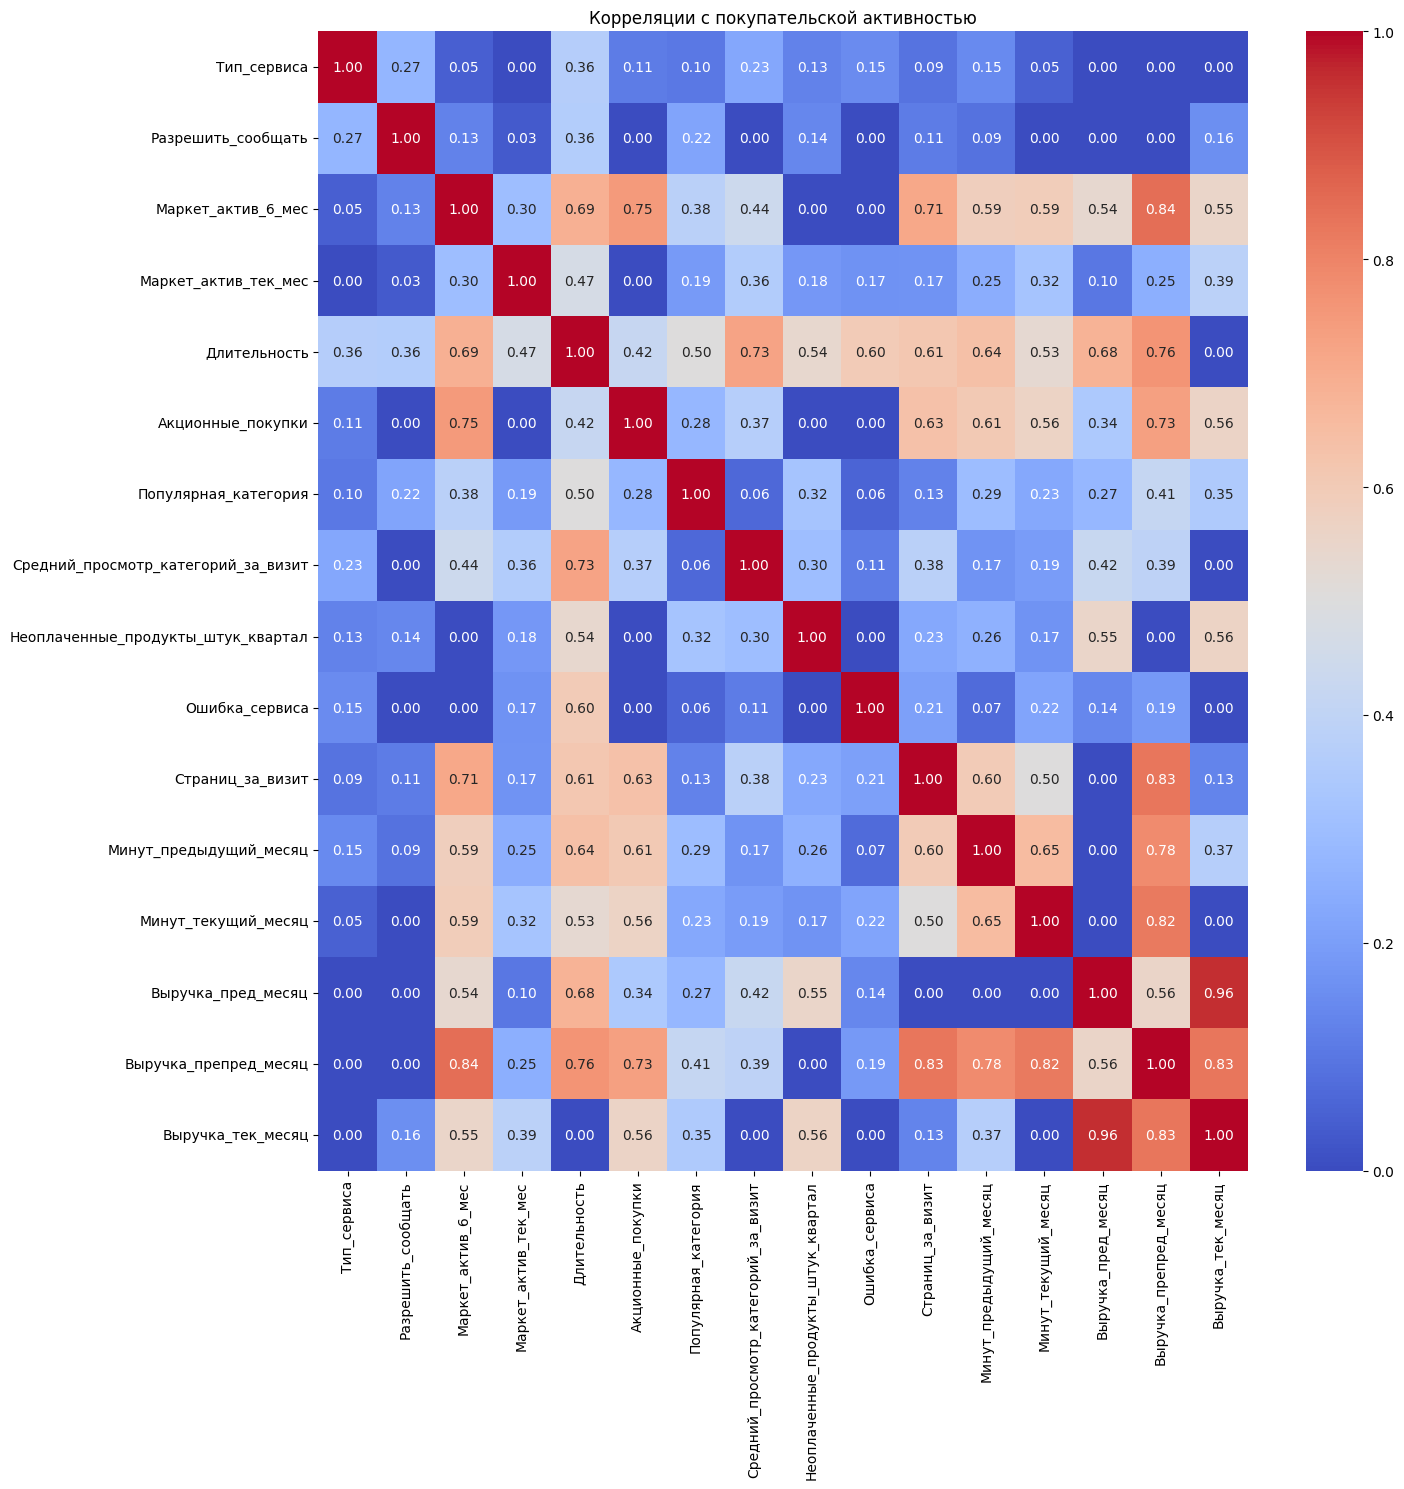

In [54]:
interval_cols = data_full.drop('id', axis=1).select_dtypes(include='number').columns.tolist()
# Выбираем и сортируем корреляции с целевой переменной
target_corr = phik_matrix(data_full[data_full['Покупательская_активность']=='Снизилась']
                          .drop(['id', 'Покупательская_активность'],axis=1), interval_cols=interval_cols, bins=100)

# Визуализация
plt.figure(figsize=(15, 15))
sns.heatmap(target_corr, 
            annot=True, 
            cmap='coolwarm',
            fmt='.2f',
            vmin=0, vmax=1)
plt.title('Корреляции с покупательской активностью')
plt.tight_layout()
plt.show()

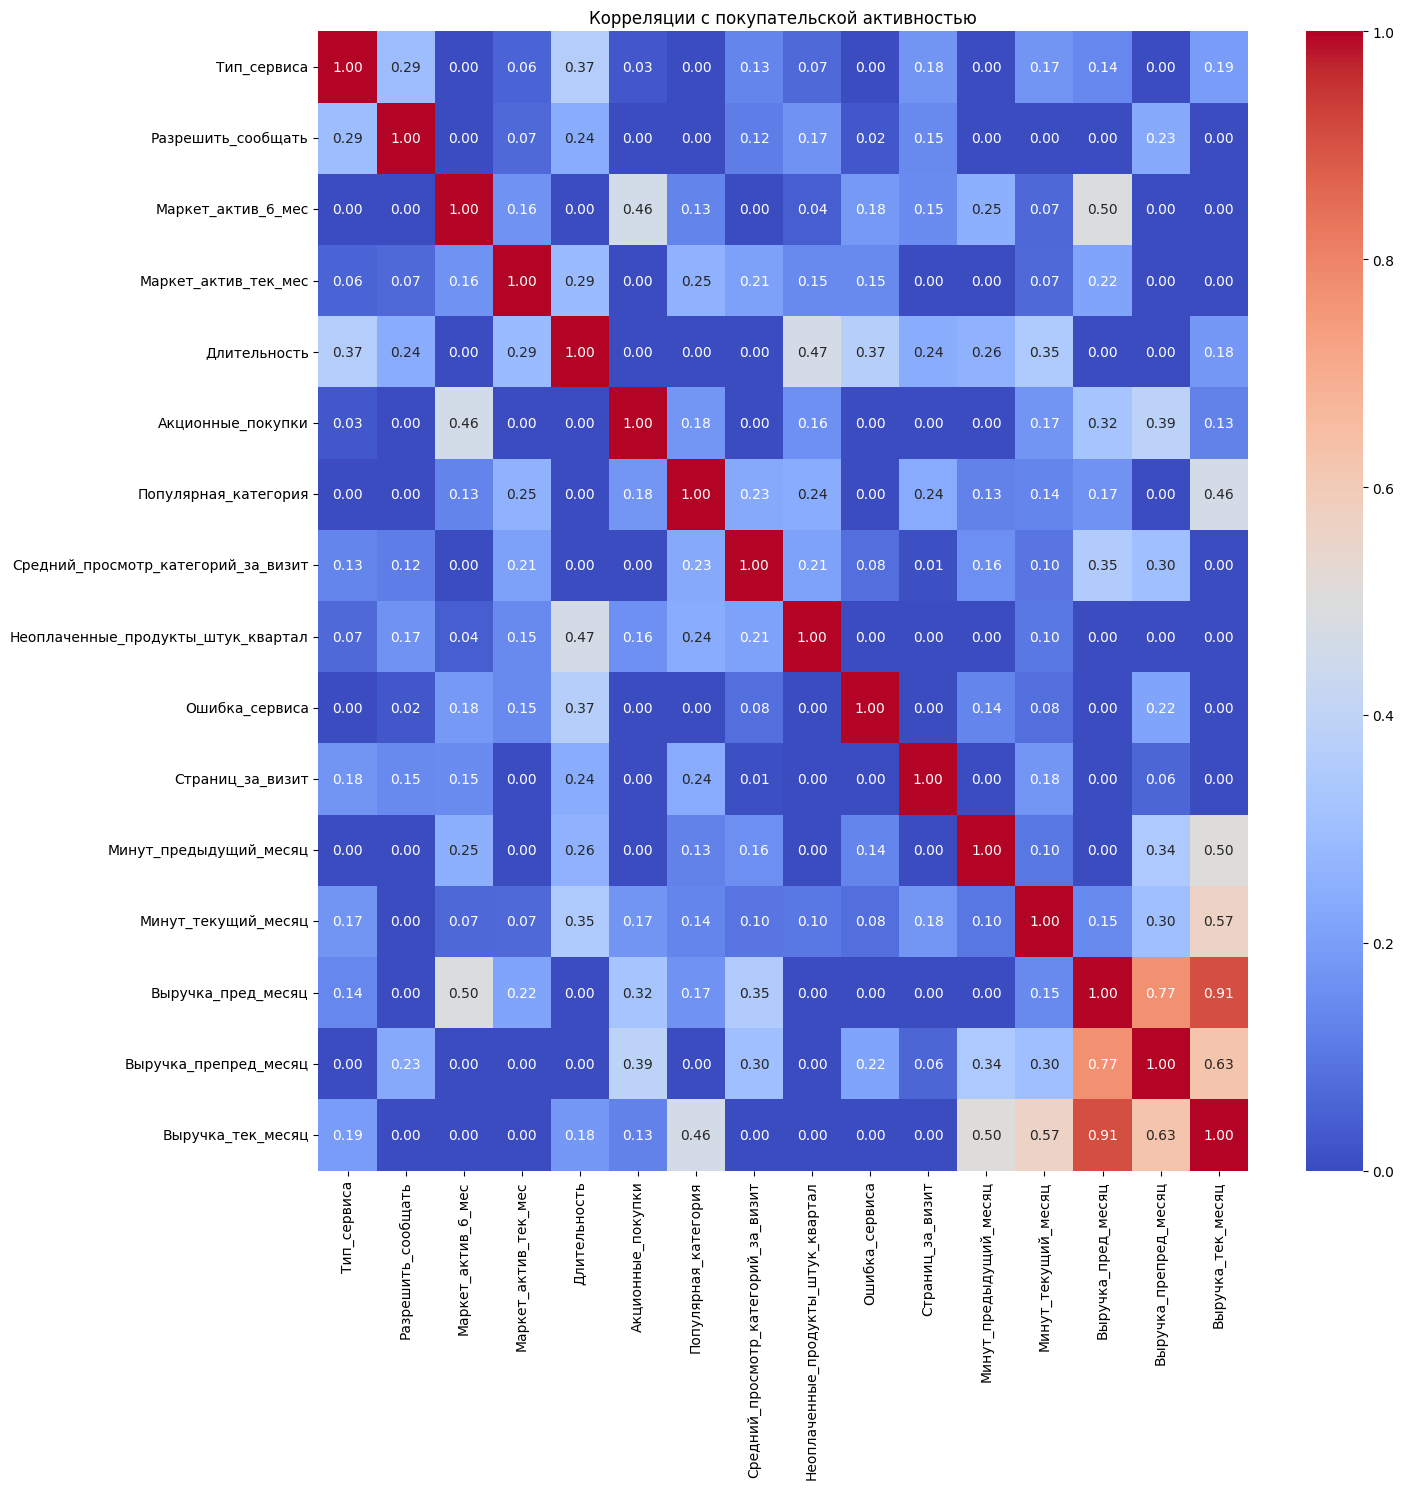

In [55]:
interval_cols = data_full.drop('id', axis=1).select_dtypes(include='number').columns.tolist()
# Выбираем и сортируем корреляции с целевой переменной
target_corr = phik_matrix(data_full[data_full['Покупательская_активность']=='Прежний уровень']
                          .drop(['id', 'Покупательская_активность'],axis=1), interval_cols=interval_cols, bins=100)

# Визуализация
plt.figure(figsize=(15, 15))
sns.heatmap(target_corr, 
            annot=True, 
            cmap='coolwarm',
            fmt='.2f',
            vmin=0, vmax=1)
plt.title('Корреляции с покупательской активностью')
plt.tight_layout()
plt.show()

<b>Вывод по корреляционному анализу:</b>

Мультиколлинеарность будем считать, если уровней корреляционной связи свыше 0.9. В обоих случаях такая связь наблюдается только между выручкой за текущий и предыдущей месяцы, но это независимые события поэтому оставим как есть.

<b>Вывод:</b>

С таргетом имеют корреляцию: Маркет_актив_6_мес, Акционные_покупки, Средний_просмотр_категорий_за_визит, Неоплаченные_продукты_штук_квартал, Страниц_за_визит, Выручка_препредыдущий_месяц, минут_предыдущий_месяц, минут_текущий_месяц.
Среди признаков замечана только одна более менее сильная корреляция Выручка_предыдущий_месяц, Выручка_текущий_месяц.

<b>6. Использование пайплайнов</b>

Обучим четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC()

In [56]:
data_full =data_full.set_index('id')

In [57]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Покупательская_активность            1296 non-null   object 
 1   Тип_сервиса                          1296 non-null   object 
 2   Разрешить_сообщать                   1296 non-null   object 
 3   Маркет_актив_6_мес                   1296 non-null   float64
 4   Маркет_актив_тек_мес                 1296 non-null   int64  
 5   Длительность                         1296 non-null   int64  
 6   Акционные_покупки                    1296 non-null   float64
 7   Популярная_категория                 1296 non-null   object 
 8   Средний_просмотр_категорий_за_визит  1296 non-null   int64  
 9   Неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 10  Ошибка_сервиса                       1296 non-null   int64  
 11  Страниц_за_визит            

In [58]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [59]:
X = data_full.drop(['Покупательская_активность'], axis=1)
y = data_full['Покупательская_активность']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y)

In [60]:
X_train.head()

Тип_сервиса Разрешить_сообщать  Маркет_актив_6_мес  \
id                                                          
215858    стандарт                 да                 5.5   
215361    стандарт                 да                 5.1   
215884    стандарт                 да                 4.3   
216564    стандарт                 да                 5.6   
215715     премиум                 да                 3.6   

        Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
id                                                              
215858                     4           510               0.15   
215361                     4           199               0.23   
215884                     5           997               0.17   
216564                     4           342               0.94   
215715                     5           873               0.39   

                        Популярная_категория  \
id                                             
215858  Мелкая бытовая техника и электроника   
215361        Техника для красоты и здоровья   
215884  Мелкая бытовая техника и электроника   
216564                       Кухонная посуда   
215715                      Товары для детей   

        Средний_просмотр_категорий_за_визит  \
id                                            
215858                                    2   
215361                                    4   
215884                                    5   
216564                                    2   
215715                                    3   

        Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
id                                                                             
215858                                   4               7                16   
215361                                   5               2                 3   
215884                                   1               3                11   
216564                                   7               5                 8   
215715                                   2               2                 5   

        Минут_предыдущий_месяц  Минут_текущий_месяц  Выручка_пред_месяц  \
id                                                                        
215858                    20.0                  6.0              5170.5   
215361                    11.0                 13.0              6400.0   
215884                    13.0                 10.0              4113.0   
216564                    14.0                 19.0              4930.0   
215715                    10.0                 10.0              3716.0   

        Выручка_препред_месяц  Выручка_тек_месяц  
id                                                
215858                 4347.0             6014.2  
215361                 4597.0             3789.7  
215884                 4626.0             3798.4  
216564                 5269.0             4766.2  
215715                 4691.0             4600.0

In [61]:
ohe_columns = ['Разрешить_сообщать', 'Популярная_категория']
ord_columns = ['Тип_сервиса']
num_columns = ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес','Акционные_покупки', 
               'Длительность', 'Средний_просмотр_категорий_за_визит',
               'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит',
               'Минут_предыдущий_месяц', 'Минут_текущий_месяц',
               'Выручка_препред_месяц', 'Выручка_тек_месяц']

In [62]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

In [63]:
ord_pipe = Pipeline([
    ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan,strategy='most_frequent')),
    ('ord', OrdinalEncoder(
        categories=[['Редко', 'Часто']],
        handle_unknown='use_encoded_value',
        unknown_value=np.nan  
    )),
    ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])

In [64]:
preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_columns),
    ('ord', ord_pipe, ord_columns),
    ('num', StandardScaler(), num_columns)  
], remainder='passthrough')


In [65]:
pipe_final = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [66]:
param_grid = [
    # Для DecisionTree
    {
        'model': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'model__max_depth': range(3, 6),
        'model__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    # Для KNN
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors':  range(2, 5),
        'preprocessor__num': [StandardScaler()]  
    },

    # Для LogisticRegression
    {
        'model': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')],
        'model__penalty': ['l1', 'l2'],
        'model__C': range(1, 5),
        'preprocessor__num': [StandardScaler(),MinMaxScaler(), 'passthrough'] 
    },
    
    # Для SVC
    {
        'model': [SVC(random_state=RANDOM_STATE, kernel='poly')],
        'model__degree': range(2, 3),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]


In [67]:
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='roc_auc', 
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1,
    
)

In [68]:
randomized_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\bocme\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
C:\Users\bocme\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['Разрешить_сообщать',
                                                                                'Популярная_категория']),
                                                                              ('ord',
                                                                               Pipelin...
                                        {'model': [LogisticRegression(random_state=42,
                                                                      solver='liblinear')],
                                         'model__C': range(1, 5),
                                         'model__penalty': ['l1', 'l2'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'model': [SVC(kernel='poly',
                                                       random_state=42)],
                                         'model__degree': range(2, 3),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc', verbose=1)

In [69]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', round(randomized_search.best_score_, 2))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Разрешить_сообщать',
                                                   'Популярная_категория']),
                                                 ('ord',
                                 

Используем метрику ROC-AUC для оценки модели на тестовых данных. Берем ее, тк нужно ранжировать клиентов по риску снижения активности и наши данные имеют небольшой дисбаланс,а ROC-AUC устойчива к нему. 

In [70]:
y_test_pred = randomized_search.predict(X_test)
y_test_proba = randomized_search.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {round(roc_auc_score(y_test, y_test_proba[:,1]), 2)}')

Метрика ROC-AUC на тестовой выборке: 0.91


C:\Users\bocme\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
C:\Users\bocme\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


Важно минимизировать оба типа ошибок, поэтому лучшей метрикой будет F1-score. Она помогает найти оптимальный баланс между точностью и полнотой.

In [71]:
print(f'Метрика F1-score на тестовой выборке: {round(f1_score(y_test, y_test_pred, average="macro"), 2)}')

Метрика F1-score на тестовой выборке: 0.89


<b>Вывод:</b>
В ходе исследования была успешно разработана и обучена модель прогнозирования снижения покупательской активности. Наилучшие результаты продемонстрировала логистическая регрессия с параметрами:

C=1

L1-регуляризацией

solver='liblinear'

фиксированным random_state=42 для воспроизводимости

Модель показала исключительно высокую предсказательную способность:

ROC-AUC:  на тестовой выборке 0.91

F1-мера достигла впечатляющего значения 0.89

Особенно стоит отметить, что модель продемонстрировала хорошие результаты несмотря на наличие дисбаланса классов в данных. Это свидетельствует о хорошей сбалансированности модели и ее устойчивости к неравномерному распределению целевой переменной.

Полученные метрики позволяют сделать вывод о высокой эффективности модели для решения поставленной задачи прогнозирования снижения активности пользователей.

<b>7. Анализ важности признаков</b>

C:\Users\bocme\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
C:\Users\bocme\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


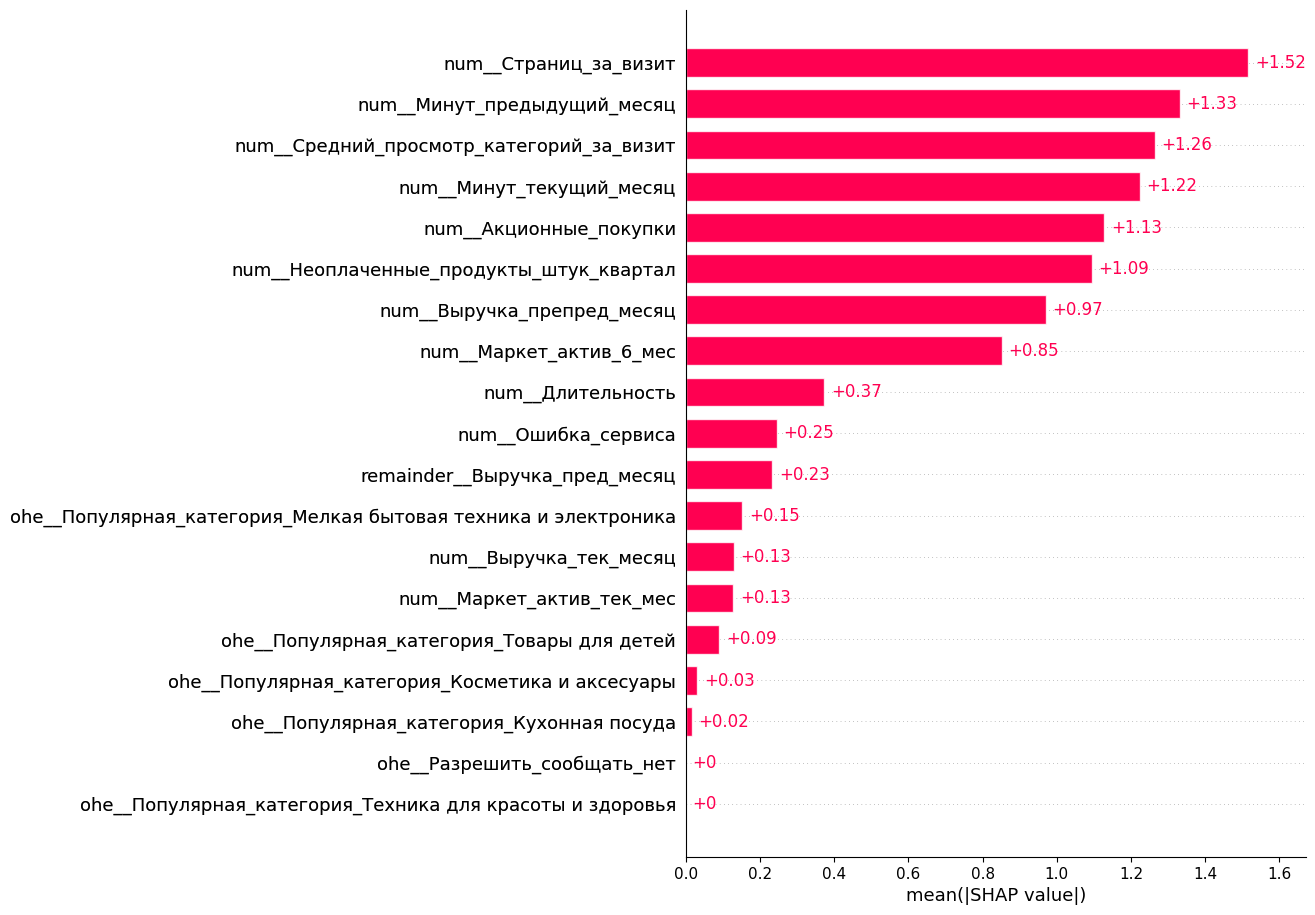

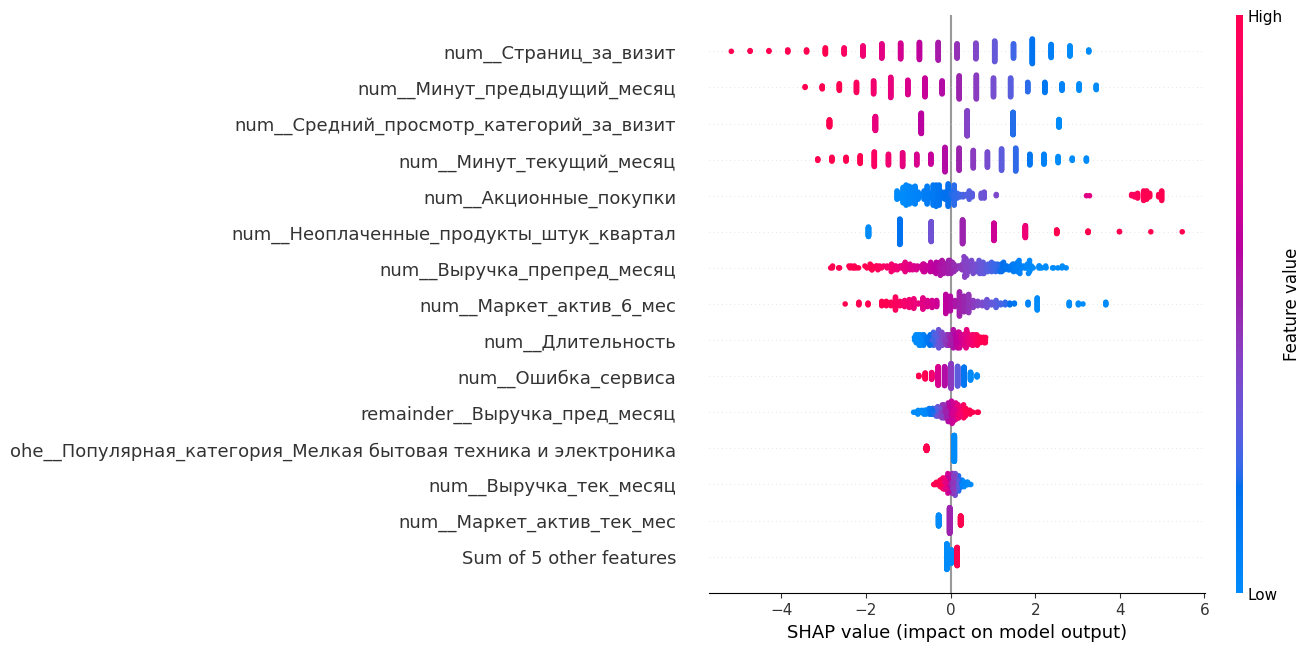

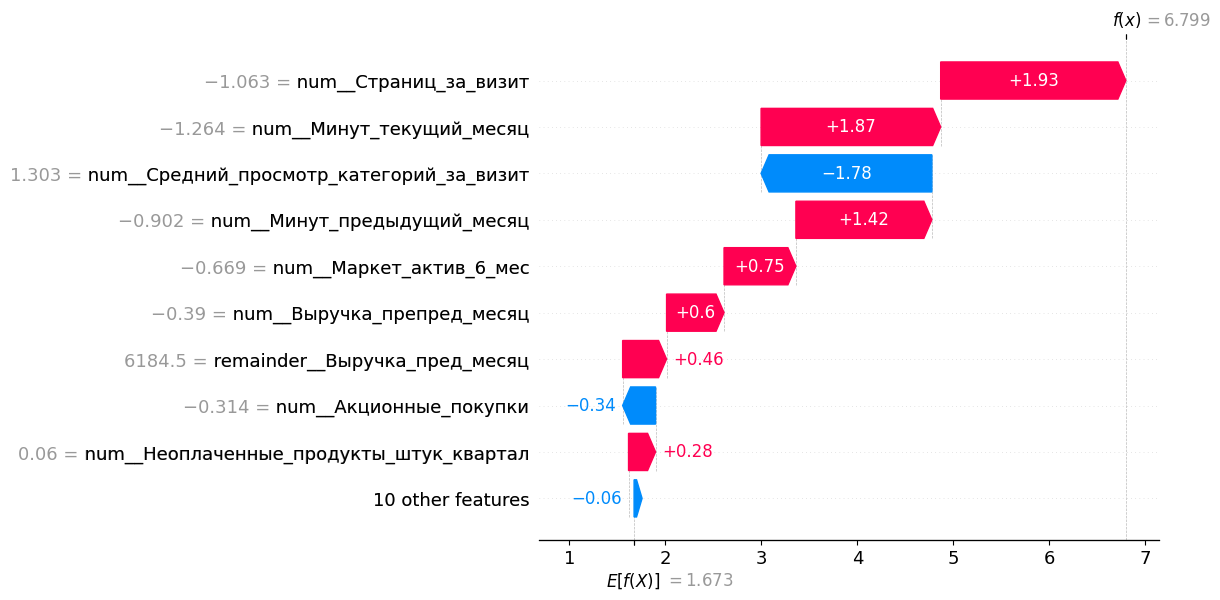

In [72]:
X_train_2 = pipe_final.named_steps['preprocessor'].fit_transform(X_train)
explainer = shap.LinearExplainer(randomized_search.best_estimator_.named_steps['model'], X_train_2)

X_test_2 = pipe_final.named_steps['preprocessor'].transform(X_test)
feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()
X_test_2 = pd.DataFrame(X_test_2, columns=feature_names)

shap_values = explainer(X_test_2)

# Создаем фигуры перед отображением
plt.figure()
shap.plots.bar(shap_values, max_display=30)
plt.show()

plt.figure()
shap.plots.beeswarm(shap_values, max_display=15)
plt.show()

plt.figure()
shap.plots.waterfall(shap_values[181])
plt.show()

<b>Вывод:</b>
Получилось что пять самыйх важных для модели признаков это: Страниц_за_визит, Средний_просмотр_категорий_за_визит, мин_предыдущий_месяц, мин_текущий_месяц, неоплаченный_продукты_штук_квартал. 
Есть в этом логика, чем больше старниц и чем больше времени потратитшь тем больше вероятность,чтот-то купить.

Малозначимыми признаками оказались:Популярная категория(кроме бытовой техники), Маркет_актив_тек_мес, Разрешить сообщать, Тип_сервиса, Выручка_текущий_месяц, Длительность, Ошибка_сервиса, Выручка_предыдущий_месяц.
В целом, я согласен с большинством выводов модели, особенно учитывая, что мы анализируем только активных покупателей. В таком контексте такие признаки, как дата регистрации или технические ошибки, действительно теряют свою значимость – что логично отразилось на результатах.
Однако вызывает некоторые сомнения низкая важность признака «Тип сервиса».

Премиум-пользователи – здесь всё понятно: их поведение предсказуемо, так как они заинтересованы в регулярных покупках (бытовая техника, расходники), иначе подписка теряет смысл.

Стандартные пользователи – напротив, менее постоянны, и можно было ожидать, что модель выделит этот признак как значимый.

Возможные объяснения:

Влияние других факторов – возможно, поведение стандартных пользователей лучше объясняется иными признаками (например, частотой покупок, средним чеком).

Недостаточная выраженность паттерна – если разница в активности между стандартными и премиум-пользователями невелика, модель могла "проигнорировать" этот признак.

Особенности выборки – раз мы работаем только с активными клиентами, даже стандартные пользователи в этой группе могут вести себя схоже с премиумными.
В целом наш анализа и shap совпадают.

<b>8. Сегментация покупателей</b>

Следующий этап исследования выделение конкретного сегмента пользователей и анализ их поведения с целью разработки рекомендаций для заказчика по повышению активности в этой группе.

Мне не очевидно, какой именно сегмент стоит анализировать, поэтому в качестве отправной точки я решил:

Визуализировать данные через диаграмму рассеяния, отобразив:

Прибыльность пользователей (по оси X)

Вероятность снижения активности, предсказанную моделью (по оси Y)

Такой подход позволил получить первичное представление о распределении пользователей и выделить потенциально интересные группы для более глубокого анализа.

Ключевые уточнения:

Акцент на практическую применимость исследования (разработка рекомендаций)

Объяснение логического обоснования выбранного метода

Более четкая структура изложения

Этот вариант сохраняет все смысловые элементы оригинала, но делает акцент на практической цели исследования и логике принятия решений.

In [73]:
y_test_proba = randomized_search.predict_proba(X_test)[:,1]
y_train_proba = randomized_search.predict_proba(X_train)[:,1]

C:\Users\bocme\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
C:\Users\bocme\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


In [74]:
X_test.head()

Тип_сервиса Разрешить_сообщать  Маркет_актив_6_мес  \
id                                                          
216161    стандарт                 да                 4.1   
215654     премиум                нет                 1.4   
216307     премиум                 да                 3.3   
215501     премиум                 да                 3.5   
215934    стандарт                нет                 5.5   

        Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
id                                                              
216161                     4           606               0.15   
215654                     4           684               0.94   
216307                     4           488               0.13   
215501                     3          1057               0.35   
215934                     4           147               0.99   

                        Популярная_категория  \
id                                             
216161        Техника для красоты и здоровья   
215654                      Товары для детей   
216307                     Домашний текстиль   
215501                     Домашний текстиль   
215934  Мелкая бытовая техника и электроника   

        Средний_просмотр_категорий_за_визит  \
id                                            
216161                                    6   
215654                                    3   
216307                                    4   
215501                                    4   
215934                                    1   

        Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
id                                                                             
216161                                   1               4                12   
215654                                   6               1                 6   
216307                                   2               8                10   
215501                                   3               5                 6   
215934                                   2               3                 7   

        Минут_предыдущий_месяц  Минут_текущий_месяц  Выручка_пред_месяц  \
id                                                                        
216161                    16.0                 17.0              3973.0   
215654                    11.0                  9.0              3548.0   
216307                    20.0                 11.0              5444.0   
215501                     9.0                  9.0              6604.0   
215934                    15.0                 18.0              5090.0   

        Выручка_препред_месяц  Выручка_тек_месяц  
id                                                
216161                 4912.0             3289.2  
215654                 4656.0             4170.7  
216307                 4565.0             6335.8  
215501                 4993.0             6758.7  
215934                 4451.0             5773.8

In [75]:
X_test_full = X_test.copy()
X_train_full = X_train.copy()
X_test_full['Вероятность_снижения'] = y_test_proba
X_train_full['Вероятность_снижения'] = y_train_proba
df_full = pd.concat([X_train_full, X_test_full])

money = money.set_index('id')
df_full = df_full.join(money)

In [76]:
df_full.head(5)

Тип_сервиса Разрешить_сообщать  Маркет_актив_6_мес  \
id                                                          
215858    стандарт                 да                 5.5   
215361    стандарт                 да                 5.1   
215884    стандарт                 да                 4.3   
216564    стандарт                 да                 5.6   
215715     премиум                 да                 3.6   

        Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
id                                                              
215858                     4           510               0.15   
215361                     4           199               0.23   
215884                     5           997               0.17   
216564                     4           342               0.94   
215715                     5           873               0.39   

                        Популярная_категория  \
id                                             
215858  Мелкая бытовая техника и электроника   
215361        Техника для красоты и здоровья   
215884  Мелкая бытовая техника и электроника   
216564                       Кухонная посуда   
215715                      Товары для детей   

        Средний_просмотр_категорий_за_визит  \
id                                            
215858                                    2   
215361                                    4   
215884                                    5   
216564                                    2   
215715                                    3   

        Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
id                                                                             
215858                                   4               7                16   
215361                                   5               2                 3   
215884                                   1               3                11   
216564                                   7               5                 8   
215715                                   2               2                 5   

        Минут_предыдущий_месяц  Минут_текущий_месяц  Выручка_пред_месяц  \
id                                                                        
215858                    20.0                  6.0              5170.5   
215361                    11.0                 13.0              6400.0   
215884                    13.0                 10.0              4113.0   
216564                    14.0                 19.0              4930.0   
215715                    10.0                 10.0              3716.0   

        Выручка_препред_месяц  Выручка_тек_месяц  Вероятность_снижения  \
id                                                                       
215858                 4347.0             6014.2              0.146552   
215361                 4597.0             3789.7              0.640760   
215884                 4626.0             3798.4              0.102563   
216564                 5269.0             4766.2              0.617450   
215715                 4691.0             4600.0              0.643104   

        Прибыль  
id               
215858     4.37  
215361     4.03  
215884     4.37  
216564     5.58  
215715     4.87

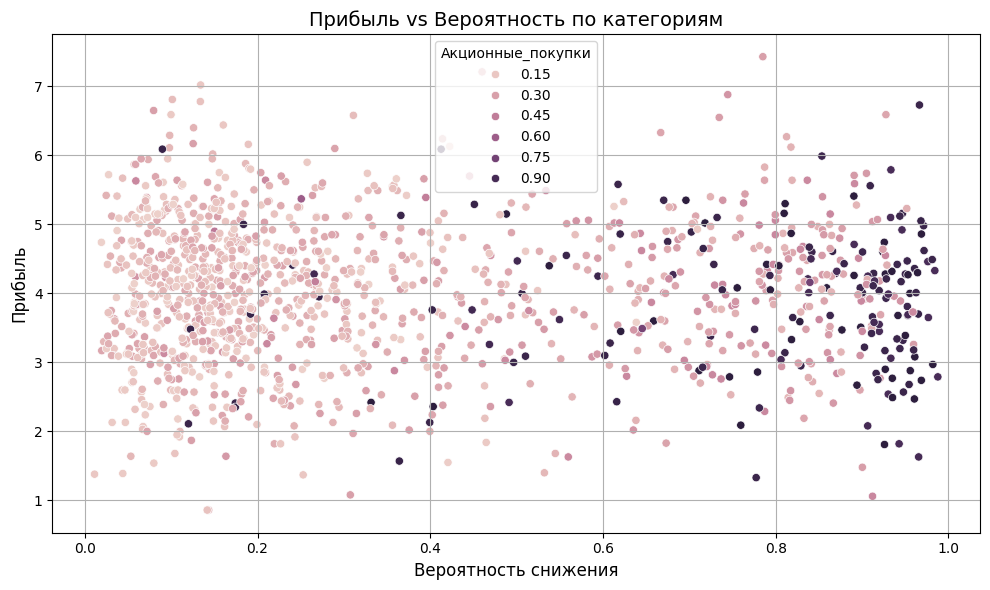

In [77]:
graphik(
    Dataframe=df_full,
    kind='scatter',
    name_graphik='Прибыль vs Вероятность по категориям',
    name_x='Вероятность снижения',
    name_y='Прибыль',
    x_column='Вероятность_снижения',
    y_column='Прибыль',
    hue='Акционные_покупки' 
)

Пользователи, регулярно совершающие покупки по акционным предложениям, демонстрируют статистически значимо более низкую вероятность снижения активности около 1. Это фактор стоит взять для сегментации.

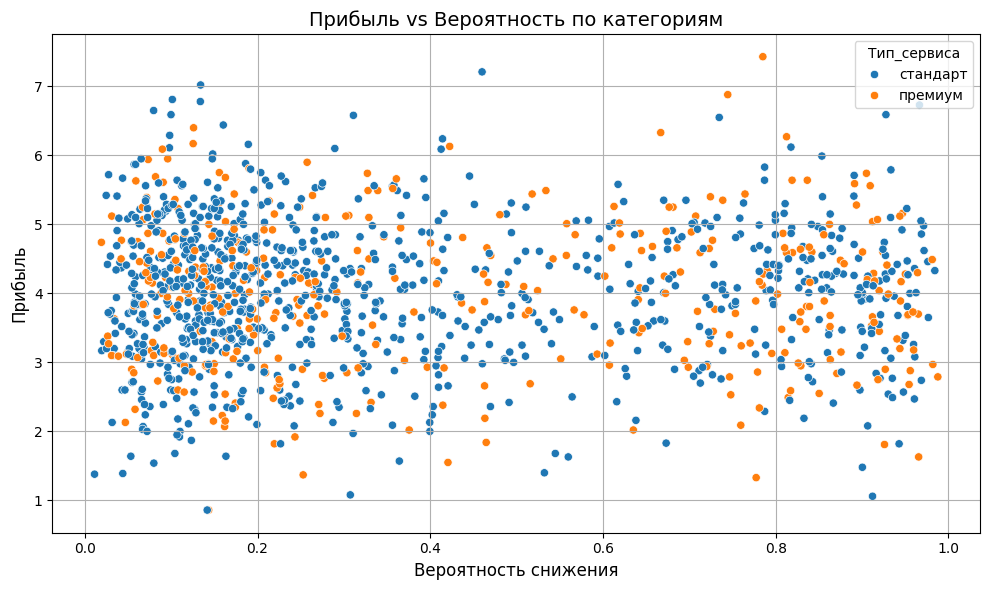

In [78]:
graphik(
    Dataframe=df_full,
    kind='scatter',
    name_graphik='Прибыль vs Вероятность по категориям',
    name_x='Вероятность снижения',
    name_y='Прибыль',
    x_column='Вероятность_снижения',
    y_column='Прибыль',
    hue='Тип_сервиса' # Столбец для цветового разделения        # Цветовая схема
              # Размер точек
)

Нет явной зависимости

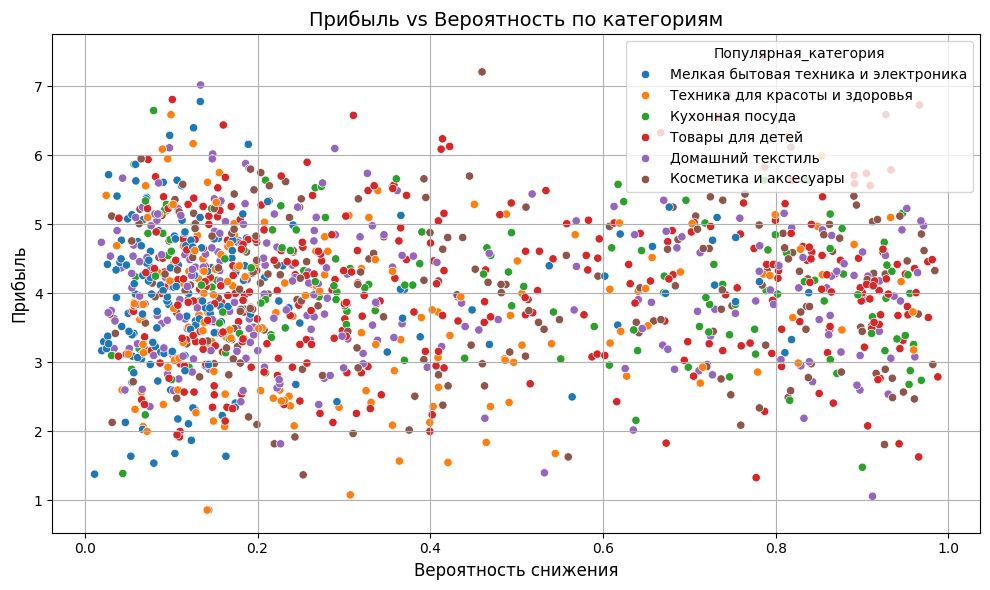

In [79]:
graphik(
    Dataframe=df_full,
    kind='scatter',
    name_graphik='Прибыль vs Вероятность по категориям',
    name_x='Вероятность снижения',
    name_y='Прибыль',
    x_column='Вероятность_снижения',
    y_column='Прибыль',
    hue='Популярная_категория' # Столбец для цветового разделения        # Цветовая схема
              # Размер точек
)

Сложно разобратся, не тявной зависимости

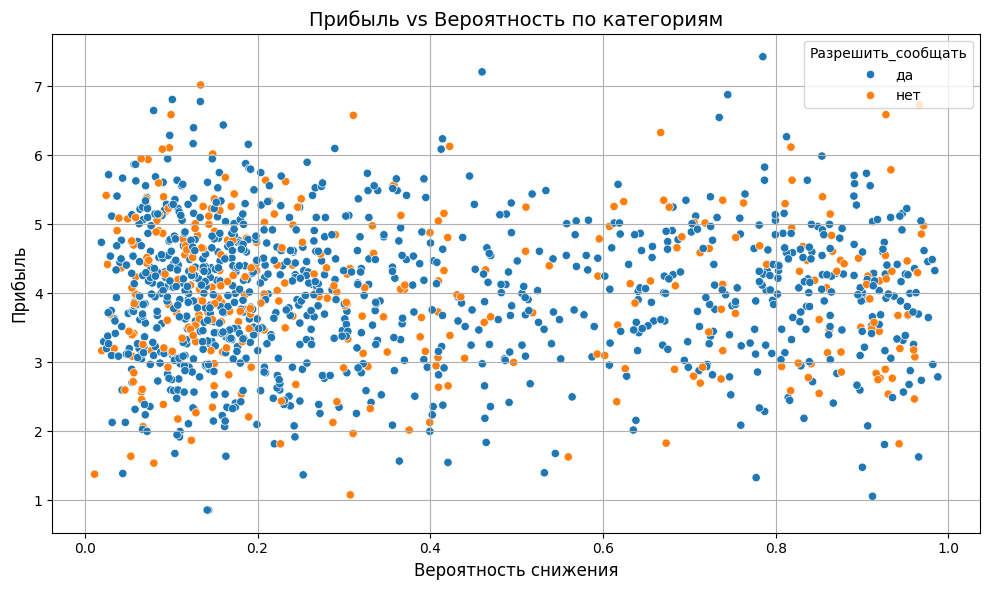

In [80]:
graphik(
    Dataframe=df_full,
    kind='scatter',
    name_graphik='Прибыль vs Вероятность по категориям',
    name_x='Вероятность снижения',
    name_y='Прибыль',
    x_column='Вероятность_снижения',
    y_column='Прибыль',
    hue='Разрешить_сообщать' # Столбец для цветового разделения        # Цветовая схема
              # Размер точек
)

Немного выделяется "да" возле вероятности 0. Нет явно зависимости 

Закончились категоринные данные будем сами их создвавать

Переведем длительность из дней в годы

In [81]:
def ditelnost(days):
    if days/365<1: 
        return 'меньше года'
    elif 2>days/365>1: 
        return '1 год'
    elif 3>days/365>2: 
        return '2 год'
    elif days/365>3: 
        return 'более 3 '
    
df_full['Длительность,в годах']=df_full['Длительность'].apply(ditelnost)   
df_full['Длительность,в годах'].value_counts()

Длительность,в годах
1 год          578
2 год          446
меньше года    267
Name: count, dtype: int64

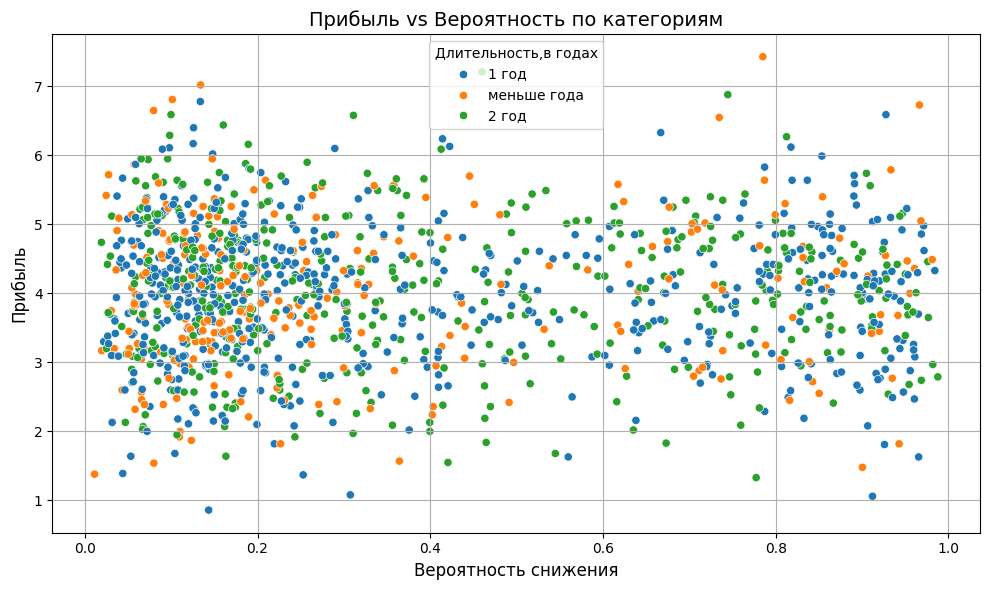

In [82]:
graphik(
    Dataframe=df_full,
    kind='scatter',
    name_graphik='Прибыль vs Вероятность по категориям',
    name_x='Вероятность снижения',
    name_y='Прибыль',
    x_column='Вероятность_снижения',
    y_column='Прибыль',
    hue='Длительность,в годах' #
)


Нет явной зависимости

Разделим по числу страниц за визит 

In [83]:
def vizit(count):
    if count<=5: 
        return '5 и меньше'
    elif 10>=count>5: 
        return '5-10'
    elif count>10: 
        return 'более 10'
    
    
df_full['Страниц_за_визит,кат']=df_full['Страниц_за_визит'].apply(vizit)   
df_full['Страниц_за_визит,кат'].value_counts()


Страниц_за_визит,кат
5-10          549
5 и меньше    378
более 10      369
Name: count, dtype: int64

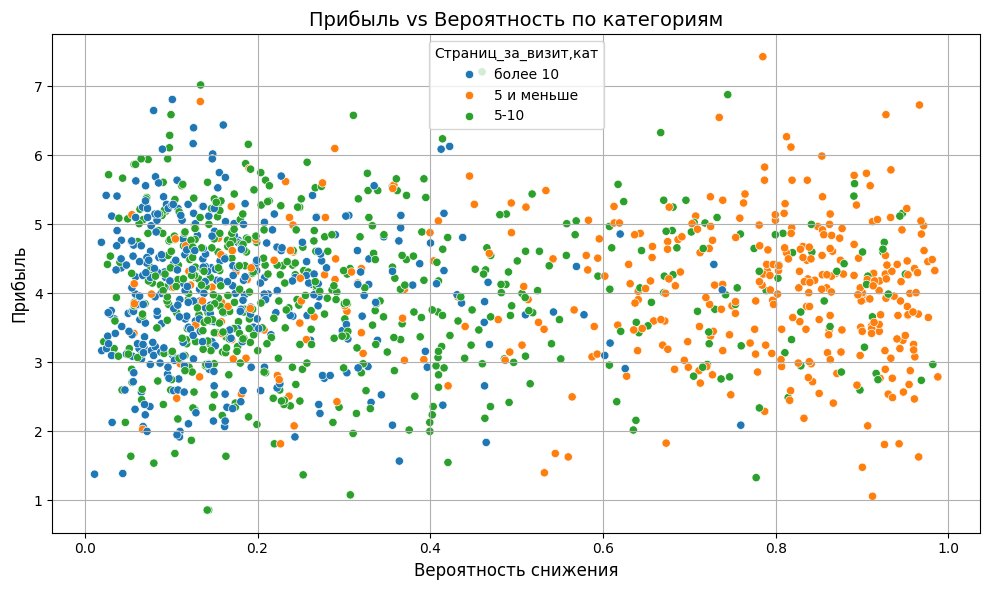

In [84]:
graphik(
    Dataframe=df_full,
    kind='scatter',
    name_graphik='Прибыль vs Вероятность по категориям',
    name_x='Вероятность снижения',
    name_y='Прибыль',
    x_column='Вероятность_снижения',
    y_column='Прибыль',
    hue='Страниц_за_визит,кат' # Столбец для цветового разделения        # Цветовая схема
              # Размер точек
)


Чем меньше визитов, тем больше вероятность.

Минут_текущий_месяц разделим на 3 группы

In [85]:
def times(minutes):
    if minutes<=10: 
        return '10 и меньше'
    elif 15>=minutes>10: 
        return '10-15'
    elif minutes>15: 
        return 'более 15'
    
df_full['Минут_текущий_месяц,кат']=df_full['Минут_текущий_месяц'].apply(times)   
df_full['Минут_текущий_месяц,кат'].value_counts()

Минут_текущий_месяц,кат
10-15          523
более 15       389
10 и меньше    384
Name: count, dtype: int64

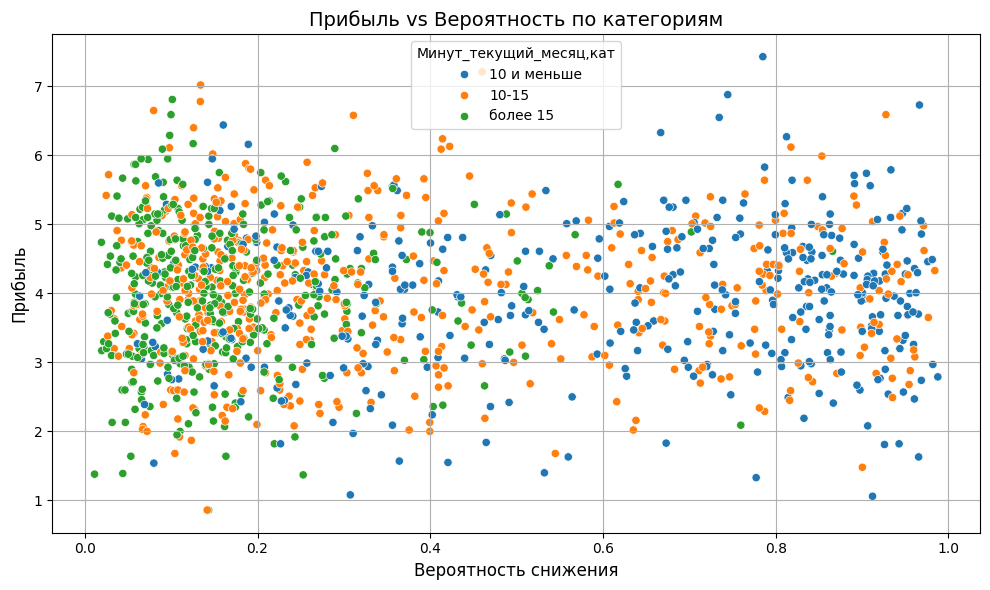

In [86]:
graphik(
    Dataframe=df_full,
    kind='scatter',
    name_graphik='Прибыль vs Вероятность по категориям',
    name_x='Вероятность снижения',
    name_y='Прибыль',
    x_column='Вероятность_снижения',
    y_column='Прибыль',
    hue='Минут_текущий_месяц,кат' # Столбец для цветового разделения        # Цветовая схема
              # Размер точек
)


Чем больше минут, тем меньше вероятность.

Неоплаченные_продукты_штук_квартал разделим на 3 группы

In [87]:
def unpaid_products(products):
    if products<=1: 
        return '0-1'
    elif 3>=products>=2: 
        return '2-3'
    elif products>=4: 
        return '4 и более'
    
df_full['Неоплаченные_продукты_штук_квартал,кат']=df_full['Неоплаченные_продукты_штук_квартал'].apply(unpaid_products)   
df_full['Неоплаченные_продукты_штук_квартал,кат'].value_counts()

Неоплаченные_продукты_штук_квартал,кат
2-3          475
4 и более    444
0-1          377
Name: count, dtype: int64

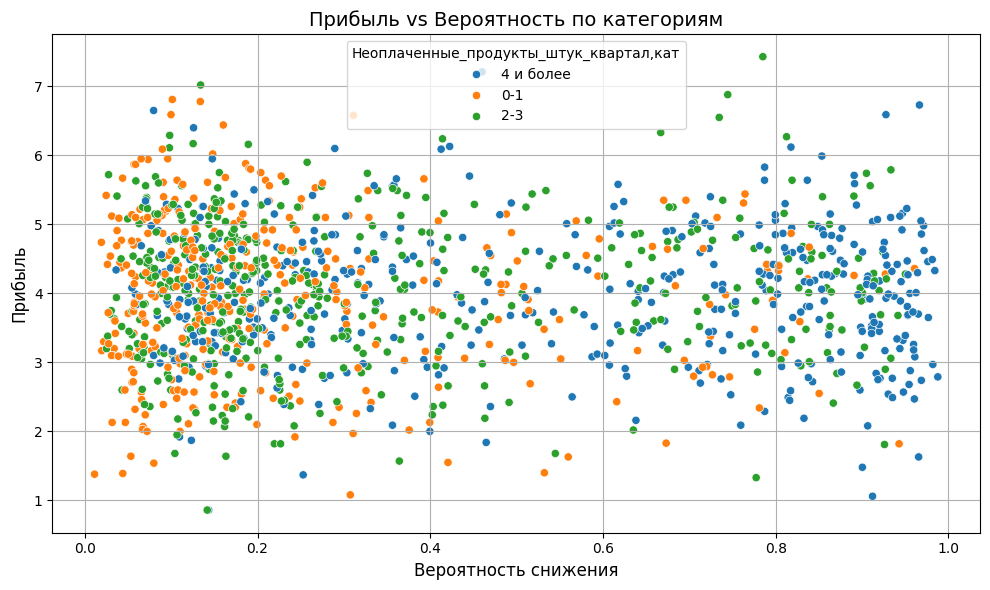

In [88]:
graphik(
    Dataframe=df_full,
    kind='scatter',
    name_graphik='Прибыль vs Вероятность по категориям',
    name_x='Вероятность снижения',
    name_y='Прибыль',
    x_column='Вероятность_снижения',
    y_column='Прибыль',
    hue='Неоплаченные_продукты_штук_квартал,кат' # Столбец для цветового разделения        # Цветовая схема
              # Размер точек
)

Вероятность снижения высокая если количество товара 4 и более 

Средний_просмотр_категорий_за_визит разделим на 3 группы

In [89]:
def average_category(category):
    if category<=2: 
        return '1-2'
    elif 4>=category>2: 
        return '3-4'
    elif category>=5: 
        return '5 и более'
    
df_full['Средний_просмотр_категорий_за_визит,кат']=df_full['Средний_просмотр_категорий_за_визит'].apply(average_category)   
df_full['Средний_просмотр_категорий_за_визит,кат'].value_counts()

Средний_просмотр_категорий_за_визит,кат
3-4          616
1-2          418
5 и более    262
Name: count, dtype: int64

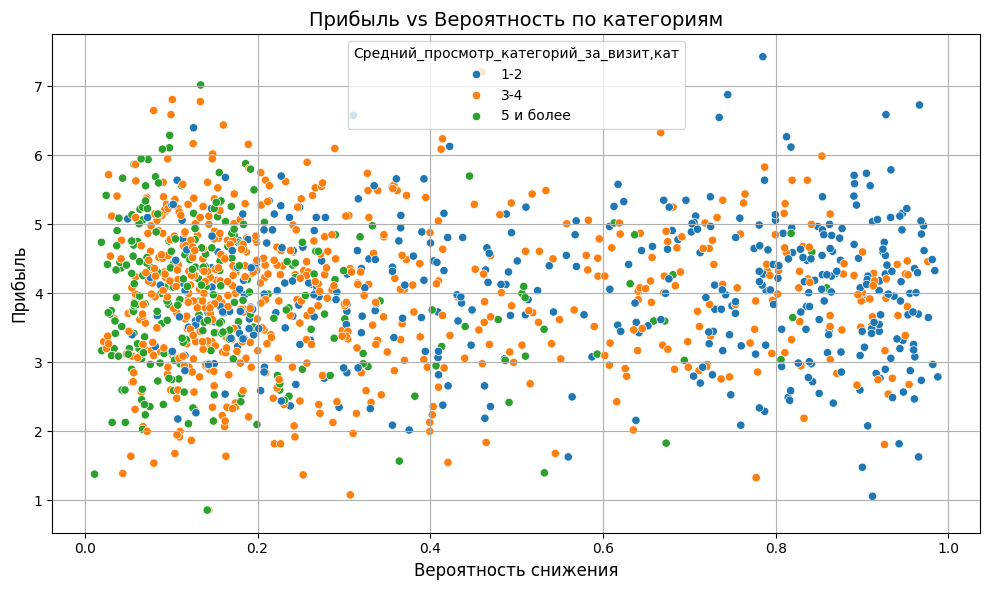

In [90]:
graphik(
    Dataframe=df_full,
    kind='scatter',
    name_graphik='Прибыль vs Вероятность по категориям',
    name_x='Вероятность снижения',
    name_y='Прибыль',
    x_column='Вероятность_снижения',
    y_column='Прибыль',
    hue='Средний_просмотр_категорий_за_визит,кат' # Столбец для цветового разделения        # Цветовая схема
              # Размер точек
)

Чем больше средний просмотров категерий чем ниже вероятность синжения 

In [91]:
def market(mean_count):
    if mean_count<4: 
        return 'менее 4'
    elif 5>=mean_count>=4: 
        return '4-5'
    elif mean_count>5: 
        return 'более 5'
    
df_full['Маркет_актив_6_мес,кат']=df_full['Маркет_актив_6_мес'].apply(market)   
df_full['Маркет_актив_6_мес,кат'].value_counts()

Маркет_актив_6_мес,кат
4-5        553
менее 4    447
более 5    296
Name: count, dtype: int64

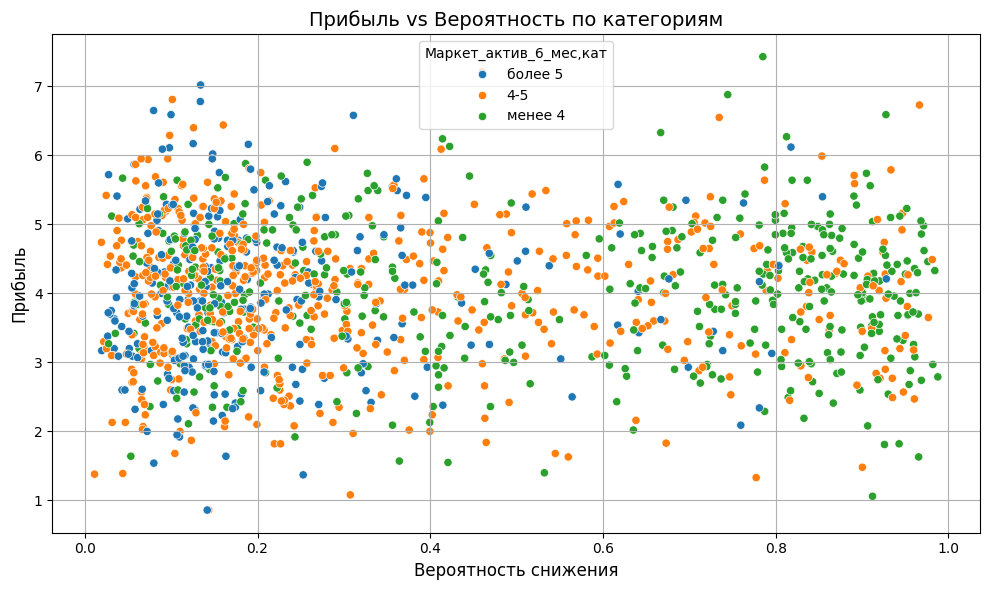

In [92]:
graphik(
    Dataframe=df_full,
    kind='scatter',
    name_graphik='Прибыль vs Вероятность по категориям',
    name_x='Вероятность снижения',
    name_y='Прибыль',
    x_column='Вероятность_снижения',
    y_column='Прибыль',
    hue='Маркет_актив_6_мес,кат' # Столбец для цветового разделения        # Цветовая схема
              # Размер точек
)

Чем меньше маркет тем больше вероятность

На графиках особенно заметна взаимосвязь между категорией "Акционные покупки" и вероятностью. Видно, что пользователи, часто совершающие покупки по скидкам, обычно имеют повышенную вероятность снижения активности. Эта закономерность вполне объяснима: поскольку специальные предложения доступны не постоянно, такие клиенты демонстрируют сезонный паттерн покупок.

Примечательно, что пользователи, ориентированные на скидки, равномерно распределены по всему диапазону прибыльности - они встречаются как среди высокодоходных, так и среди низкодоходных клиентов.

Для более детального изучения эту группу, мы создадим специальную метки в данных, выделив пользователей.


Часто совершают покупки по акциям  выше 80%

Имеют прогнозируемую вероятность снижения активности выше 80%


In [93]:
df_full['Cегмент'] = df_full.apply( lambda x: 'Исследуемый сегмент' \
        if x['Вероятность_снижения'] > 0.8 and x['Акционные_покупки']>0.8 \
        else 'Остальные пользователи' \
      , axis=1)
df_segment_sale=df_full.loc[df_full['Cегмент']=='Исследуемый сегмент']
df_full['Cегмент'].value_counts()

Cегмент
Остальные пользователи    1193
Исследуемый сегмент        103
Name: count, dtype: int64

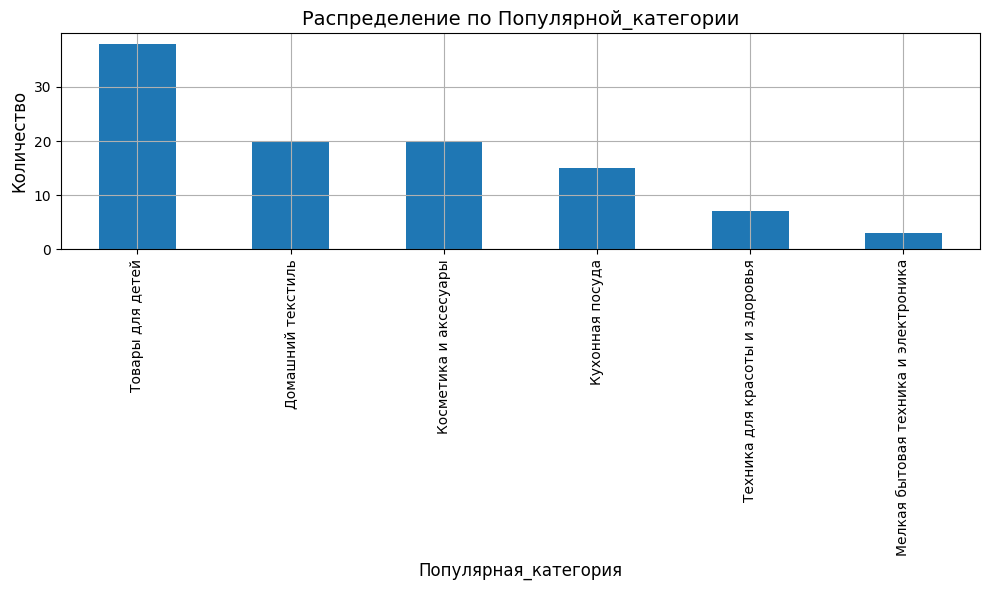

In [94]:
graphik(df_segment_sale['Популярная_категория'],'bar','Распределение по Популярной_категории', 
    'Популярная_категория','Количество')


Самая популярная категория товары для детей и косметика, предположу что основные покупатели это мамы в декрете, 25–40 лет, которые делают комплексные покупки для семьи.

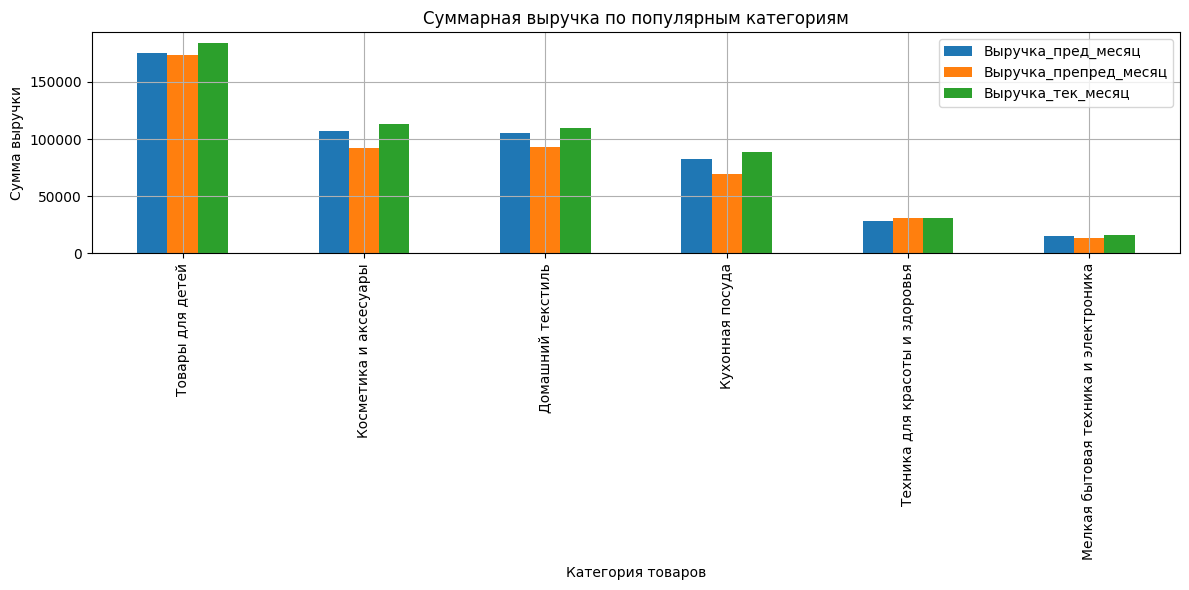

In [95]:
(df_segment_sale
 .pivot_table(index='Популярная_категория', 
              values=['Выручка_препред_месяц','Выручка_пред_месяц','Выручка_тек_месяц'],
              aggfunc='sum')
 .sort_values(by='Выручка_пред_месяц', ascending=False)
 .plot(kind='bar', 
       grid=True,
       figsize=(12, 6),
       title='Суммарная выручка по популярным категориям',
       ylabel='Сумма выручки',
       xlabel='Категория товаров'))
 
plt.tight_layout()
plt.show()

Выручка от месяца к месяцу увеличивается, почти во всех категориях.

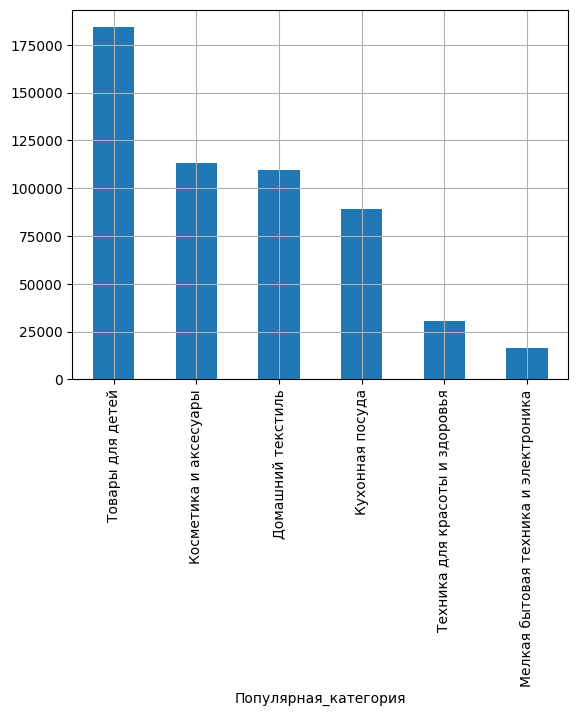

In [96]:
df_segment_sale.groupby('Популярная_категория')['Выручка_тек_месяц'].sum().sort_values(ascending=False).plot(kind='bar', grid=True)
plt.show()

Самая большая выручка товары для дома.

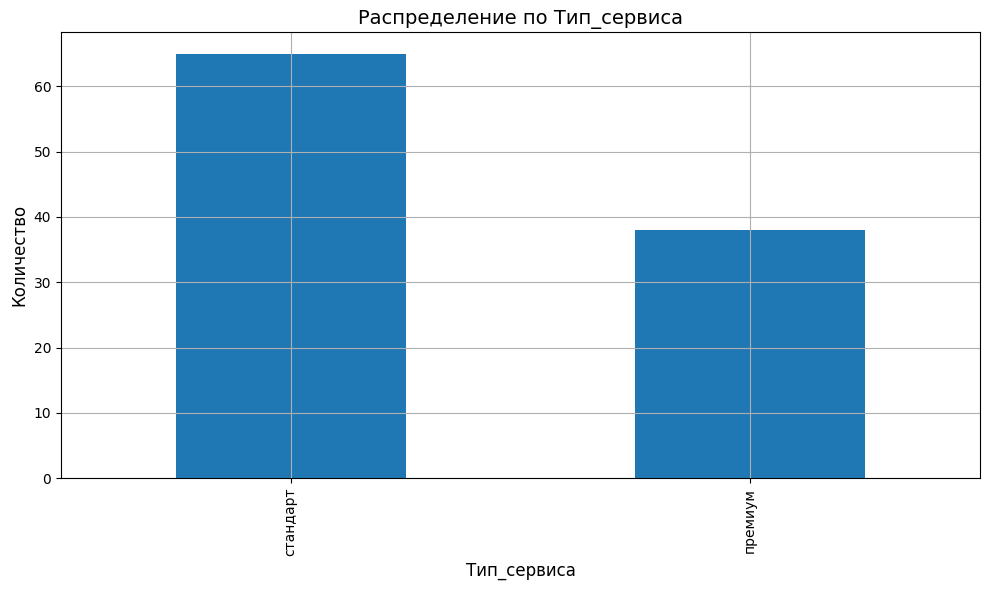

In [97]:
graphik(df_segment_sale['Тип_сервиса'],'bar','Распределение по Тип_сервиса', 
    'Тип_сервиса','Количество')


Тип сервиса стандарт в два раза больше. 

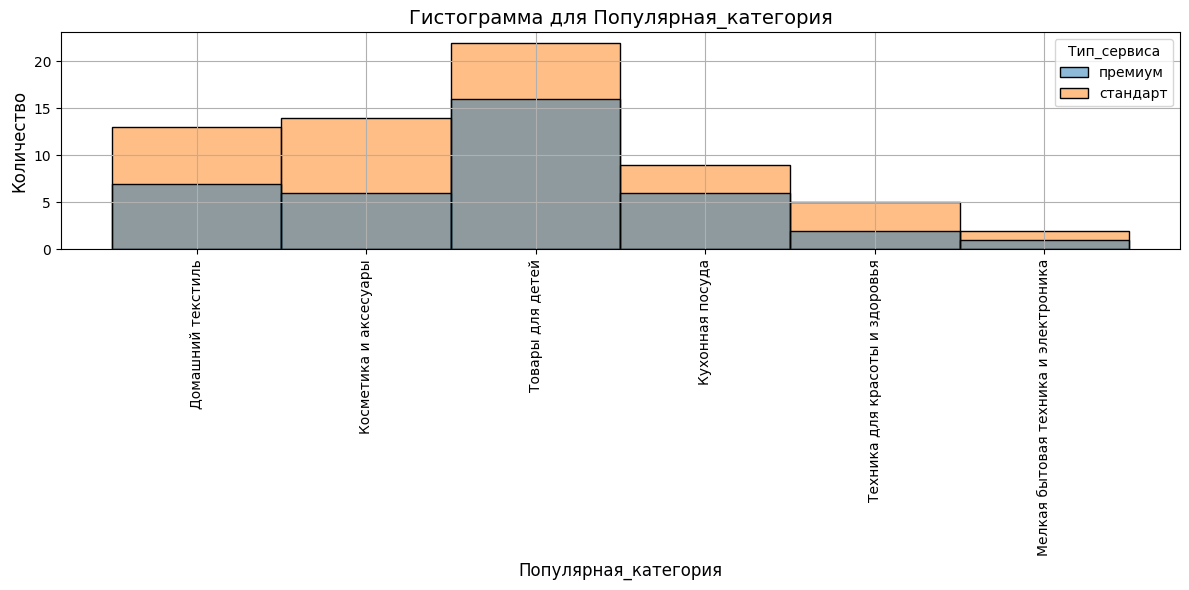

In [98]:
histogram(df_segment_sale,'Популярная_категория','Тип_сервиса',rotate_labels=90)

Зависимости категории от типа особо нет, у всех соотношения примерно одинаковые. Товары для детей может чуть больше

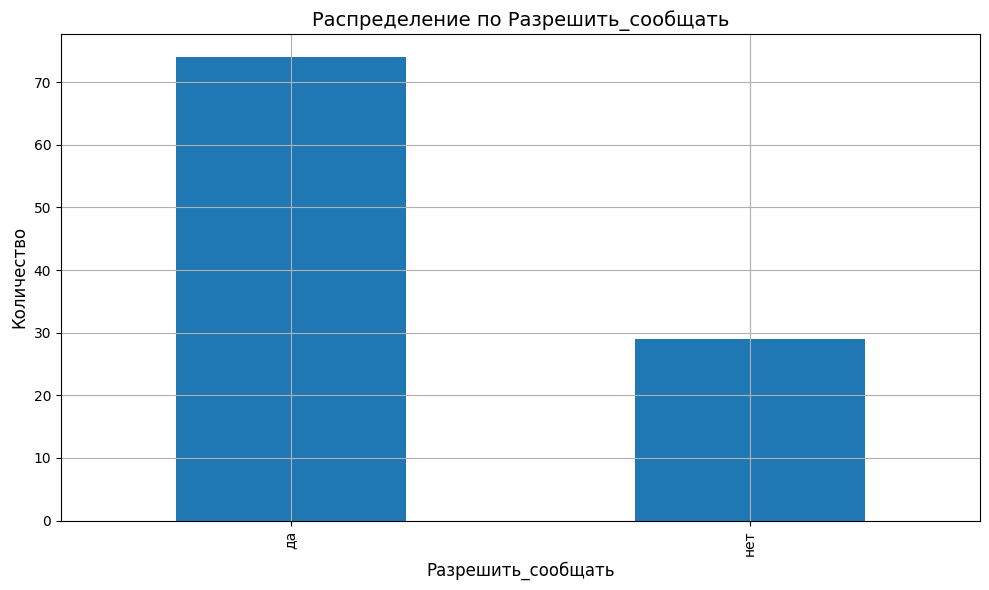

In [99]:
graphik(df_segment_sale['Разрешить_сообщать'],'bar','Распределение по Разрешить_сообщать', 
    'Разрешить_сообщать','Количество')

Разрешают рассылку больше чем запрещают, то есть пользователи хотят следить за акциями и выгодными предложениями. Это позволит, информировать пользователей и присылыть выгодные предложения.

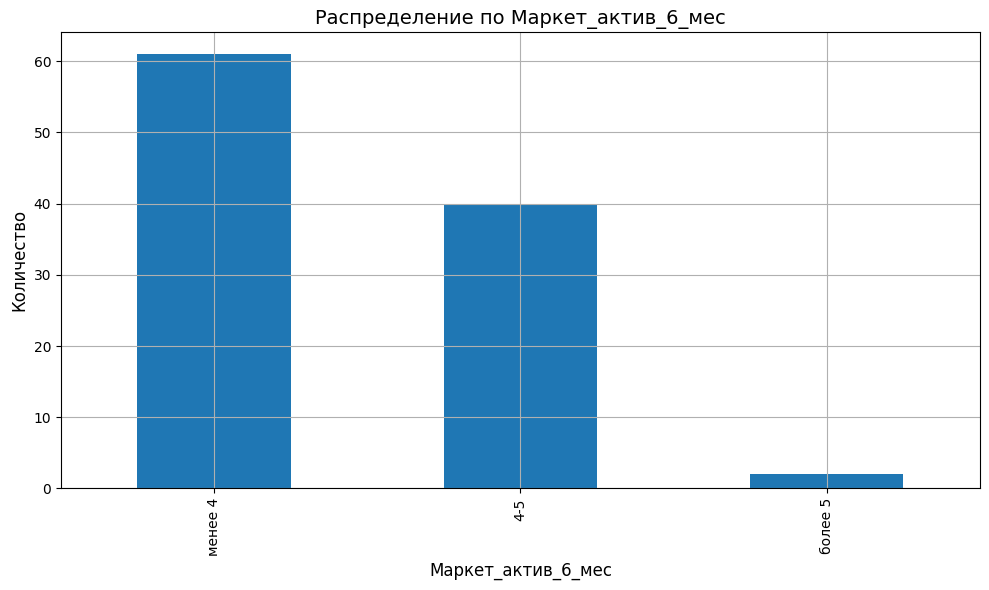

In [100]:
graphik(df_segment_sale['Маркет_актив_6_мес,кат'],'bar','Распределение по Маркет_актив_6_мес', 
    'Маркет_актив_6_мес','Количество')


Во обеих группах преобладает маркет менее 4 

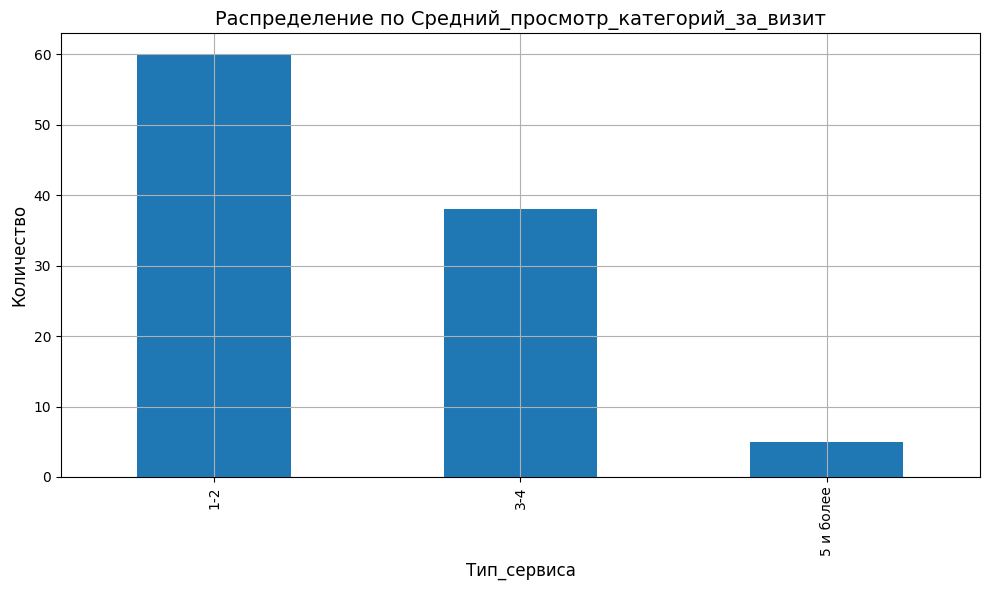

In [101]:
graphik(df_segment_sale['Средний_просмотр_категорий_за_визит,кат'],'bar','Распределение по Средний_просмотр_категорий_за_визит', 
    'Тип_сервиса','Количество')


Количество просмотренных категорий 1-2,3, значит пользователи целенаправлено делают покупки определенной категории, а не просто листают ленту в поиске товара.

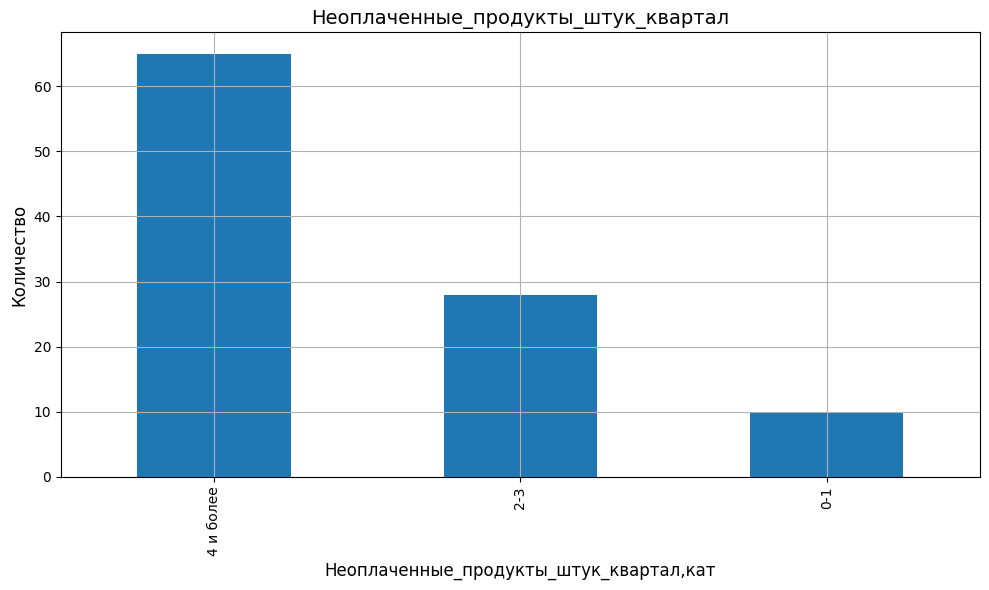

In [102]:
graphik(df_segment_sale['Неоплаченные_продукты_штук_квартал,кат'],'bar','Неоплаченные_продукты_штук_квартал', 
    'Неоплаченные_продукты_штук_квартал,кат','Количество')

Более 4 товаров в корзине, значит пользователи кладут товар, чтобы не потерять и ждут пока будет акция, чтобы заказать 

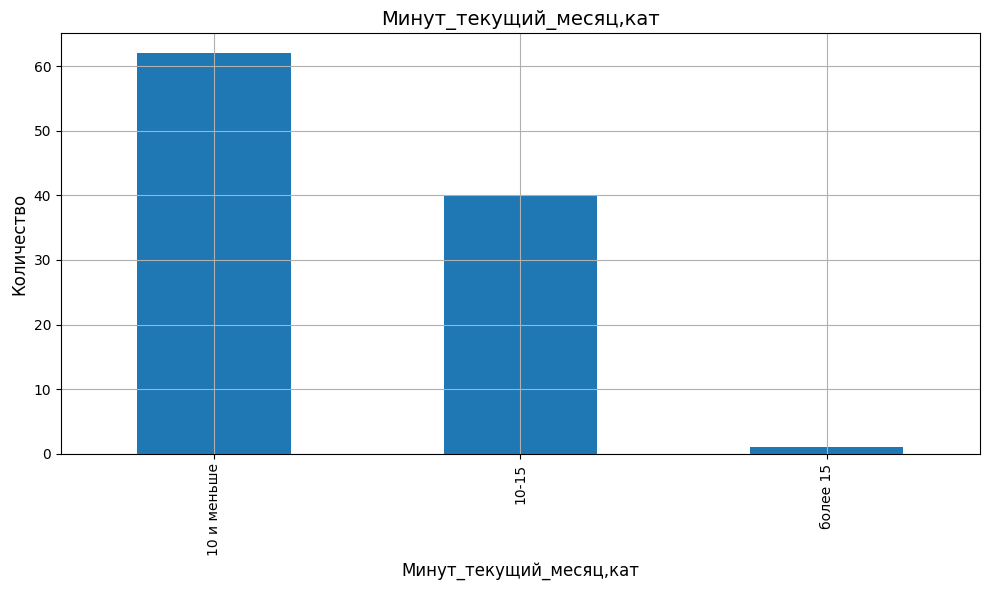

In [103]:
graphik(df_segment_sale['Минут_текущий_месяц,кат'],'bar','Минут_текущий_месяц,кат', 
    'Минут_текущий_месяц,кат','Количество')

Пользователи тратят меньше 10 минут за визит, что говорит что они точно знают что купить.

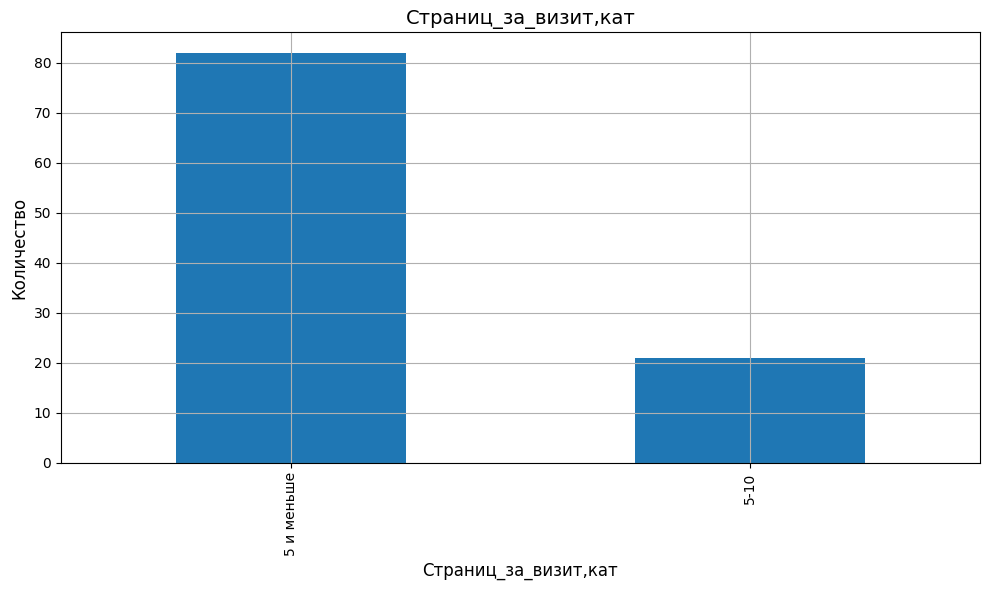

In [104]:
graphik(df_segment_sale['Страниц_за_визит,кат'],'bar','Страниц_за_визит,кат', 
    'Страниц_за_визит,кат','Количество')

Пользователи, которые покупают по акции смотрят 5 и меньше страниц, тк они точно знают что заказать

Пользователи, которые смотрят 5 и меньше страниц, редко преобладает над часто.

Для сегментации взяли группу, у которой вероятность снижения больше 0,8 и акционные покупки часто. По результам анализа
портрет пользователя: 
1.Женщина с ребенком 25-40 лет.
2.Закупается по акции с конкретными потребностями с конкретным товаром.
3.Не тратят время на поиск – знают, что хотят, быстро кладут в корзину и ждут скидку
4.Лояльны к рассылкам (не отписываются, разрешают уведомления).
5.Часть из них – премиум-пользователи (готовы платить за удобство).

Основная проблема:
1.Если не видят акцию вовремя – снижеют активность.
2.Низкая вовлеченность вне периода акций.

Чтобы исправить это пользователь должен быть проинформирован об акции и смог быстро этот товар найти это необходимо. 
1.Попросить пользователя выбрать любимые категории или товар и сделать рассылку, когда на него будет акция. 
2.На главной странице сделать подбор товара, который уже по скидке.
3.Добавить вкладку персональные предложения любимых категорий по акции так можно увелить время на сайте и возможно увеличить прибыль.

<b>9.Общий вывод</b>

<b>Загрузка данных</b>

Исходными данными для исследования были четыре отдельных csv файла:

с данными о поведении покупателя на сайте, коммуникации с ним и его продуктовом поведении.
с данными о выручке, которую получает магазин с покупателя за период
с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода
данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю Данные были загружены в датафреймы библиотеки pandas.

<b>Предобработка данных</b>
    
В датасете data маркет_актив_6_мес преобразовали из object в float,заменили в названии столбцов пробелы на нижнее подчеркивание, устранили неявный дубликат в столбце Тип сервиса. 

В датасете market_money в столбце 'Выручка' явная аномалия 106862, удалили его.

В датасете time необходимо исправить столбец минут писать с большой буквы, нашли опечатку в столбце период 'предыдцщий_месяц' заменили на 'предыдущий_месяц'

В датасете money преобразовали столбец Прибыль из object в float,предварительно заменили запятые на точки. 

<b>Исследовательский анализ данных</b>

Были выявлены и исправлены ошибки в данных, включая опечатки, которые хорошо визуализировались на построенных графиках распределений.

Обнаружено незначительное количество явных аномалий - такие выбросы были исключены из дальнейшего анализа для повышения качества данных.

Проведенная проверка показала, что в целом данные имеют хорошее качество и пригодны для анализа.

В выборку включены только активные пользователи - те, кто совершал покупки в течение последнего квартала (3 месяцев). 

Таким образом, данные были очищены и подготовлены для последующего углубленного анализа и построения моделей.


<b>Корреляционный анализ данных</b>

С таргетом(покупательская активность) имеют корреляцию: Маркет_актив_6_мес, Акционные_покупки, Средний_просмотр_категорий_за_визит, Неоплаченные_продукты_штук_квартал, Страниц_за_визит, Выручка_препредыдущий_месяц, минут_предыдущий_месяц, минут_текущий_месяц.
Среди признаков замечана только одна более менее сильная корреляция Выручка_предыдущий_месяц, Выручка_текущий_месяц.
Так же график показал сильную зависимость между целевым признаком и id так что в дальнейшем при подготовке данных к обучению модели признак идентификатор был удален. 


<b>Объеденение таблиц</b>

Датасеты data, market_money, time были объеденены в один датафрейм.


<b>Обучение модели</b>

С использованием пайпланов из библиотеки sklearn были обучены модели KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC(). При обучении моделей подобрали гиперпараметры с лучшим результатом.
По результатам обучения лучшей стала модель LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear'). Метрика roc_auc для тренеровочной выборки 0.89 для тестовой 0.91. Удивительно, но значения метрики имеют такой низкий разброс. И даже наличие дисбаланса в целевом признаке не помешало получить значение метрики f1=0.89.

<b>Анализ важности признаков</b>

На основе анализа данных становится очевидно, что ключевым фактором, влияющим на покупательскую активность, является время, которое пользователь проводит на маркетплейсе. Чем дольше человек остается на платформе, тем выше вероятность совершения покупки.


<b>Сегментация пользователей</b>

Для анализа пользователей было выбрано сегмент пользователей, который  имеет высокую вероятность снижения покупательской активности и часто совершающие покупки по скидке.

Чтобы увеличить продажи, маркетплейсу стоит сосредоточиться на оптимизации внутреннего – улучшении навигации, персонализации ленты товаров. Рассылки и спам необходимо использовать точечно, когда действительно стоит информировать пользователя. Главная задача – сделать так, чтобы пользователь добровольно задерживался на платформе, был информирован о выгодных предложениях и быстро находил нужный товар. 

